# **Variable Descriptions for Integrated Analysis**

**Dataset Overview**

**World Bank Data:**

GDP (Gross Domestic Product): The monetary value of all finished goods and services made within a country during a specific period. It provides an economic snapshot of a country, useful for estimating economic health and growth.

CO2 Emissions (kt): Represents the kilotonnes of CO2 emissions produced annually, serving as an indicator of environmental impact and sustainability practices.

**EM-DAT **

Natural Disaster Data:

**Disaster Group:** Broad classification of the disaster, focusing here on natural disasters.

**Disaster Type: *** Specifies the type of natural disaster, e.g., Drought, Epidemic, Flood, etc.

**Country:** The nation where the disaster occurred.

**Region:** More specific location within the country where the event took place.

**Total Deaths:** The total number of confirmed deaths due to the disaster.

**Total Affected: **The total number of people affected in any way by the disaster.

**Total Damage ($):** The estimated financial damage caused by the disaster,
 expressed in USD.

**Year: **The year when the disaster occurred.

Integrated Data Structure

**Country Code (ISO_A3):** Standard ISO Alpha-3 country codes used to uniquely

identify countries in the dataset, ensuring consistency across different data sources.

**Yearly Data per Country:**

**Year: **Reflecting each record year for which data are provided, allowing for temporal analysis across several metrics.

**GDP:** Sourced annually for each country to monitor economic changes over time.

**CO2 Emissions (kt):** Annual CO2 emissions to track environmental impact
alongside economic growth.

**Predictive and Cumulative Metrics:**

Predicted Damage 2030: An estimate of potential damages from disasters projected for the year 2030, derived from historical data and trends.

**Cumulative Predicted Damage 2001-2030:** Sum of all predicted damages from 2001 to 2030, providing a long-term impact estimate which is crucial for strategic planning and policy development.

**Usage and Application**

This integrated dataset is designed to facilitate a multi-dimensional analysis of how natural disasters impact economic indicators such as GDP and environmental metrics like CO2 emissions. The data enable:


**Historical Impact Analysis:** Understanding how past disasters have affected economic and environmental aspects.

**Future Risk Assessment:** Using predictive analytics to estimate future damages, aiding in disaster preparedness and resource allocation.

**Policy Development:** Informing policymakers on effective strategies to mitigate disaster impacts, promote economic resilience, and reduce environmental footprints.

In [ ]:
# install libraries
!pip install pandas-datareader
!pip install world_bank_data --upgrade
!pip install --upgrade wbdata

In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader import wb
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.tsa.statespace.sarimax import SARIMAX
import plotly.graph_objs as go

/usr/local/lib/python3.10/dist-packages/pandas_datareader/wb.py:659: UserWarning: Problem with a World Bank Query 
 Invalid value 
  The provided parameter value is not valid. Indicator: NY.GDP.PCAP.CD
  warnings.warn(msg)
/usr/local/lib/python3.10/dist-packages/pandas_datareader/wb.py:659: UserWarning: Problem with a World Bank Query 
 Invalid value 
  The provided parameter value is not valid. Indicator: NY.GDP.PCAP.CD
  warnings.warn(msg)
/usr/local/lib/python3.10/dist-packages/pandas_datareader/wb.py:659: UserWarning: No results found from world bank. Indicator: NY.GDP.PCAP.CD
  warnings.warn(msg)
/usr/local/lib/python3.10/dist-packages/pandas_datareader/wb.py:659: UserWarning: Problem with a World Bank Query 
 Invalid value 
  The provided parameter value is not valid. Indicator: NY.GDP.PCAP.CD
  warnings.warn(msg)
/usr/local/lib/python3.10/dist-packages/pandas_datareader/wb.py:592: UserWarning: Non-standard ISO country codes: IC
  warnings.warn(
/usr/local/lib/python3.10/dist-pac

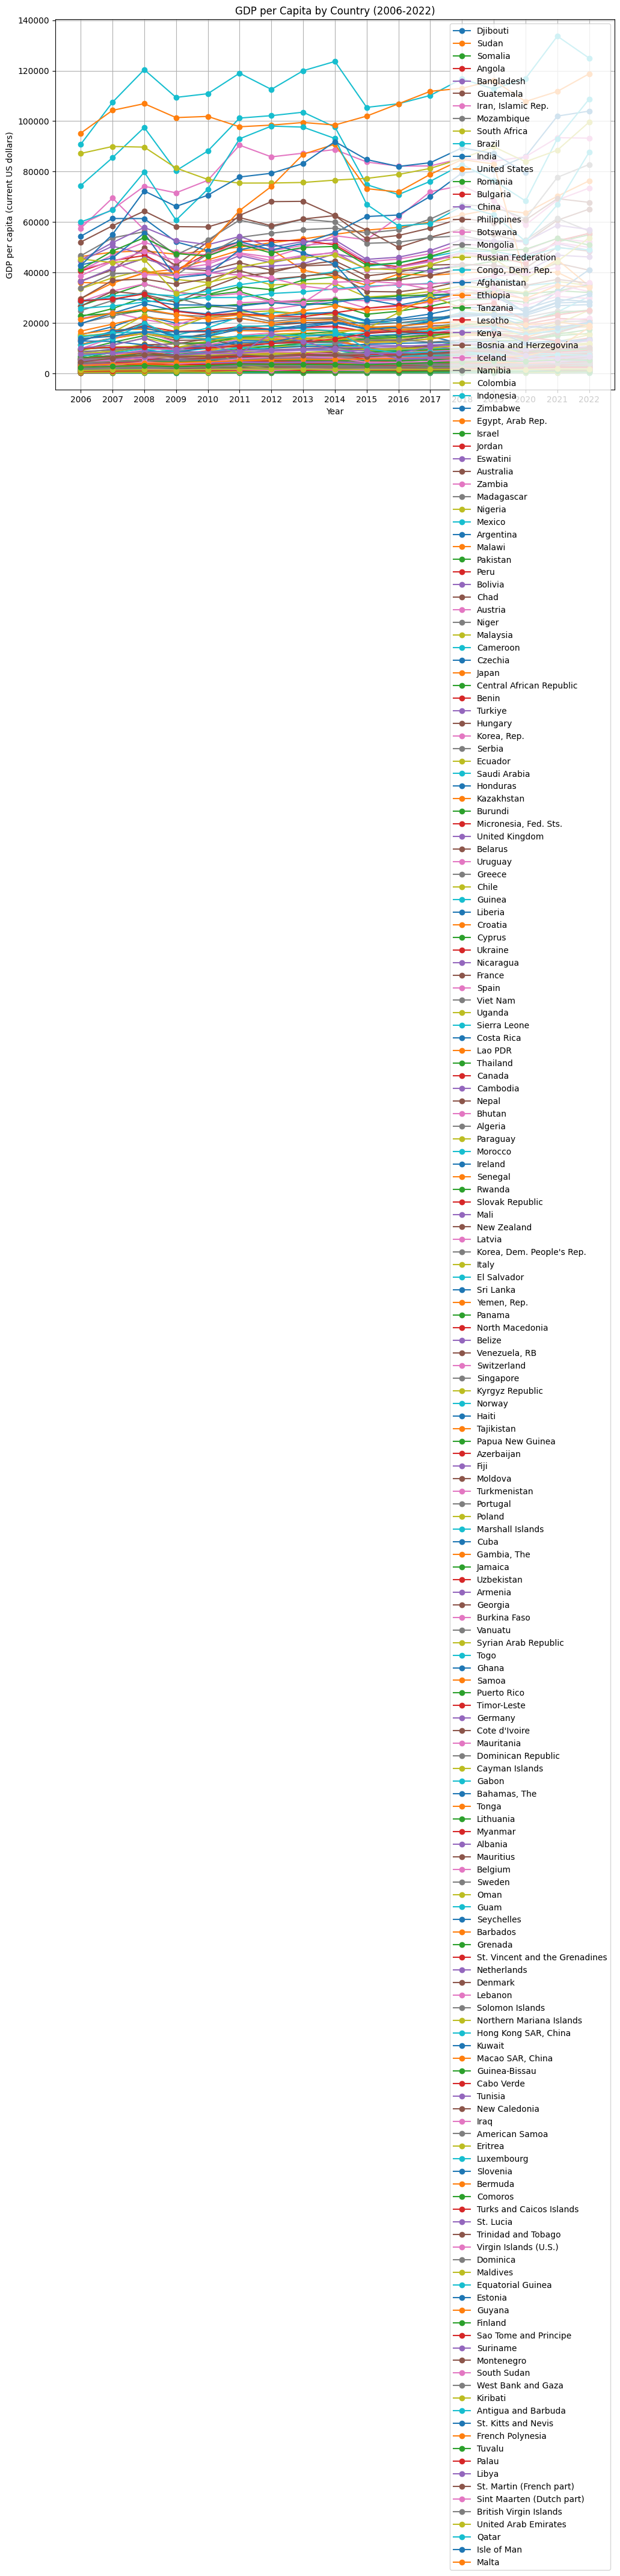

In [ ]:
# Creating a dictionary to match country names and country codes
country_codes = {
    'Djibouti': 'DJ',
    'Sudan': 'SD',
    'Somalia': 'SO',
    'Angola': 'AO',
    'Bangladesh': 'BD',
    'Guatemala': 'GT',
    'Iran (Islamic Republic of)': 'IR',
    'Mozambique': 'MZ',
    'South Africa': 'ZA',
    'Brazil': 'BR',
    'India': 'IN',
    'United States of America': 'US',
    'Romania': 'RO',
    'Bulgaria': 'BG',
    'China': 'CN',
    'Réunion': 'RE',
    'Philippines': 'PH',
    'Botswana': 'BW',
    'Mongolia': 'MN',
    'Russian Federation': 'RU',
    'Congo': 'CD',
    'Afghanistan': 'AF',
    'Ethiopia': 'ET',
    'United Republic of Tanzania': 'TZ',
    'Lesotho': 'LS',
    'Kenya': 'KE',
    'Bosnia and Herzegovina': 'BA',
    'Iceland': 'IS',
    'Namibia': 'NA',
    'Colombia': 'CO',
    'Indonesia': 'ID',
    'Zimbabwe': 'ZW',
    'Egypt': 'EG',
    'Israel': 'IL',
    'Jordan': 'JO',
    'Eswatini': 'SZ',
    'Australia': 'AU',
    'Zambia': 'ZM',
    'Madagascar': 'MG',
    'Nigeria': 'NG',
    'Mexico': 'MX',
    'Argentina': 'AR',
    'Malawi': 'MW',
    'Pakistan': 'PK',
    'Democratic Republic of the Congo': 'CD',
    'Peru': 'PE',
    'Bolivia (Plurinational State of)': 'BO',
    'Chad': 'TD',
    'Austria': 'AT',
    'Niger': 'NE',
    'Malaysia': 'MY',
    'Cameroon': 'CM',
    'Czechia': 'CZ',
    'Japan': 'JP',
    'Central African Republic': 'CF',
    'Benin': 'BJ',
    'Turkey': 'TR',  # Türkiye'nin kodu 'TR'
    'Hungary': 'HU',
    'Republic of Korea': 'KR',
    'Serbia Montenegro': 'RS',
    'Ecuador': 'EC',
    'Saudi Arabia': 'SA',
    'Honduras': 'HN',
    'French Guiana': 'GF',
    'Kazakhstan': 'KZ',
    'Burundi': 'BI',
    'Micronesia (Federated States of)': 'FM',
    'United Kingdom of Great Britain and Northern Ireland': 'GB',
    'Belarus': 'BY',
    'Uruguay': 'UY',
    'Greece': 'GR',
    'Chile': 'CL',
    'Guinea': 'GN',
    'Liberia': 'LR',
    'Croatia': 'HR',
    'Cyprus': 'CY',
    'Ukraine': 'UA',
    'Nicaragua': 'NI',
    'France': 'FR',
    'Spain': 'ES',
    'Viet Nam': 'VN',
    'Uganda': 'UG',
    'Sierra Leone': 'SL',
    'Costa Rica': 'CR',
    "Lao People's Democratic Republic": 'LA',
    'Thailand': 'TH',
    'Canada': 'CA',
    'Cambodia': 'KH',
    'Nepal': 'NP',
    'Bhutan': 'BT',
    'Algeria': 'DZ',
    'Paraguay': 'PY',
    'Morocco': 'MA',
    'Ireland': 'IE',
    'Senegal': 'SN',
    'Taiwan (Province of China)': 'TW',
    'Rwanda': 'RW',
    'Slovakia': 'SK',
    'Mali': 'ML',
    'New Zealand': 'NZ',
    'Latvia': 'LV',
    "Democratic People's Republic of Korea": 'KP',
    'Italy': 'IT',
    'El Salvador': 'SV',
    'Sri Lanka': 'LK',
    'Yemen': 'YE',
    'Panama': 'PA',
    'North Macedonia': 'MK',
    'Belize': 'BZ',
    'Venezuela (Bolivarian Republic of)': 'VE',
    'Switzerland': 'CH',
    'Singapore': 'SG',
    'Kyrgyzstan': 'KG',
    'Norway': 'NO',
    'Haiti': 'HT',
    'Tajikistan': 'TJ',
    'Papua New Guinea': 'PG',
    'Azerbaijan': 'AZ',
    'Fiji': 'FJ',
    'Republic of Moldova': 'MD',
    'Turkmenistan': 'TM',
    'Portugal': 'PT',
    'Poland': 'PL',
    'Marshall Islands': 'MH',
    'Cuba': 'CU',
    'Gambia': 'GM',
    'Jamaica': 'JM',
    'Uzbekistan': 'UZ',
    'Armenia': 'AM',
    'Georgia': 'GE',
    'Burkina Faso': 'BF',
    'Vanuatu': 'VU',
    'Syrian Arab Republic': 'SY',
    'Togo': 'TG',
    'Ghana': 'GH',
    'Samoa': 'WS',
    'Puerto Rico': 'PR',
    'Timor-Leste': 'TL',
    'Saint Helena': 'SH',
    'Germany': 'DE',
    'Côte d’Ivoire': 'CI',
    'Mauritania': 'MR',
    'Dominican Republic': 'DO',
    'Cayman Islands': 'KY',
    'Canary Islands': 'IC',
    'Cook Islands': 'CK',
    'Gabon': 'GA',
    'Bahamas': 'BS',
    'Tonga': 'TO',
    'Lithuania': 'LT',
    'Myanmar': 'MM',
    'Albania': 'AL',
    'Mauritius': 'MU',
    'Belgium': 'BE',
    'Sweden': 'SE',
    'Oman': 'OM',
    'Guam': 'GU',
    'Seychelles': 'SC',
    'Barbados': 'BB',
    'Grenada': 'GD',
    'Saint Vincent and the Grenadines': 'VC',
    'Netherlands (Kingdom of the)': 'NL',
    'Denmark': 'DK',
    'Lebanon': 'LB',
    'Solomon Islands': 'SB',
    'Northern Mariana Islands': 'MP',
    'China, Hong Kong Special Administrative Region': 'HK',
    'Kuwait': 'KW',
    'China, Macao Special Administrative Region': 'MO',
    'Guinea-Bissau': 'GW',
    'Cabo Verde': 'CV',
    'Tunisia': 'TN',
    'New Caledonia': 'NC',
    'Iraq': 'IQ',
    'American Samoa': 'AS',
    'Eritrea': 'ER',
    'Luxembourg': 'LU',
    'Slovenia': 'SI',
    'Bermuda': 'BM',
    'Comoros': 'KM',
    'Niue': 'NU',
    'Turks and Caicos Islands': 'TC',
    'Saint Lucia': 'LC',
    'Trinidad and Tobago': 'TT',
    'United States Virgin Islands': 'VI',
    'Dominica': 'DM',
    'Guadeloupe': 'GP',
    'Maldives': 'MV',
    'Equatorial Guinea': 'GQ',
    'Estonia': 'EE',
    'Guyana': 'GY',
    'Tokelau': 'TK',
    'Finland': 'FI',
    'Sao Tome and Principe': 'ST',
    'Suriname': 'SR',
    'Montserrat': 'MS',
    'Serbia': 'RS',
    'Martinique': 'MQ',
    'Montenegro': 'ME',
    'South Sudan': 'SS',
    'State of Palestine': 'PS',
    'Kiribati': 'KI',
    'Antigua and Barbuda': 'AG',
    'Saint Kitts and Nevis': 'KN',
    'French Polynesia': 'PF',
    'Tuvalu': 'TV',
    'Wallis and Futuna Islands': 'WF',
    'Palau': 'PW',
    'Libya': 'LY',
    'Anguilla': 'AI',
    'Saint Barthélemy': 'BL',
    'Saint Martin (French Part)': 'MF',
    'Sint Maarten (Dutch part)': 'SX',
    'British Virgin Islands': 'VG',
    'United Arab Emirates': 'AE',
    'Qatar': 'QA',
    'Isle of Man': 'IM',
    'Malta': 'MT'
}

# Required parameters
start_year = 2006
end_year = 2022

# Country codes
country_codes_list = list(country_codes.values())

# Verileri depolamak için boş bir DataFrame oluştur
df = pd.DataFrame()

# Her ülke için döngü
for country, code in country_codes.items():
    try:
        # Belirli bir ülkenin verilerini indir
        gdp_data = wb.download(indicator='NY.GDP.PCAP.CD', country=code, start=start_year, end=end_year)

        # Veriyi DataFrame'e ekle
        df_temp = pd.DataFrame(gdp_data.reset_index())

        # Eğer df boşsa, df_temp'i df olarak ayarla
        if df.empty:
            df = df_temp
        else:
            # Eğer df doluysa, df_temp'i df'e ekleyin
            df = pd.concat([df, df_temp])
    except ValueError:
        # World Bank'ta bu ülke adı bulunamadığında devam et
        continue

# Unique countries
unique_countries = df['country'].unique()

# Line graph for each country
plt.figure(figsize=(12, 8))
for country_code in unique_countries:
    country_data = df[df['country'] == country_code]
    plt.plot(country_data['year'], country_data['NY.GDP.PCAP.CD'], label=country_code, marker='o')

plt.title('GDP per Capita by Country (2006-2022)')
plt.xlabel('Year')
plt.ylabel('GDP per capita (current US dollars)')
plt.legend()
plt.grid(True)

# reverse axis x
plt.gca().invert_xaxis()

plt.show()



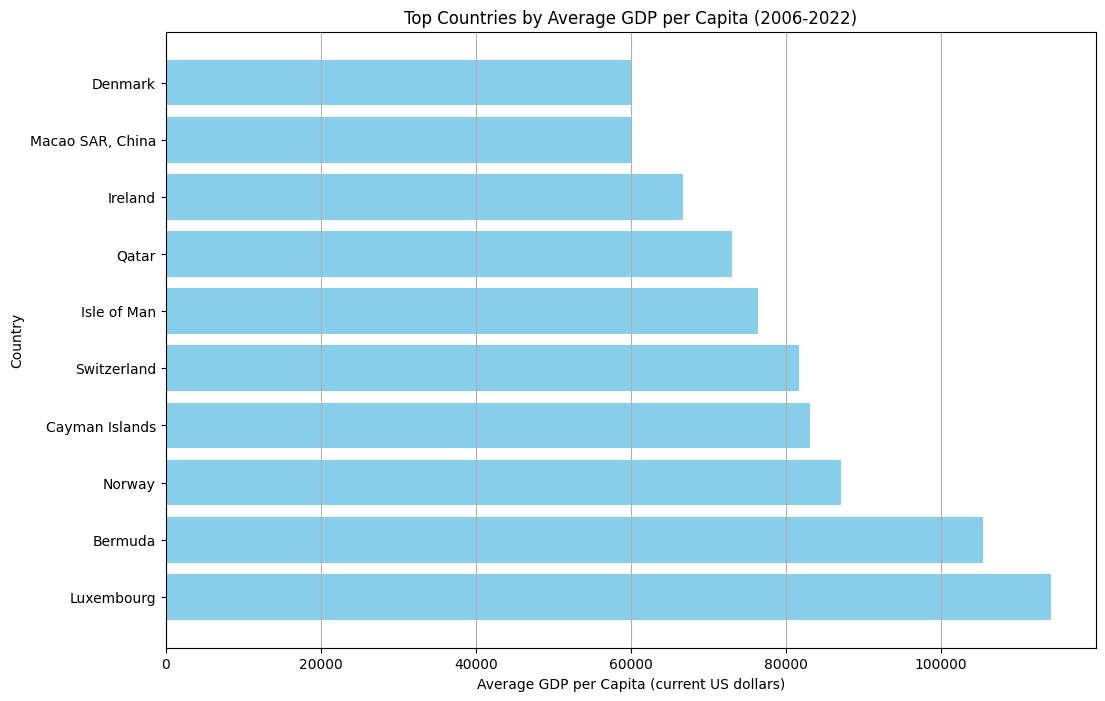

In [ ]:
# Calculate average GDP per capita for each country
average_gdp_per_capita = df.groupby('country')['NY.GDP.PCAP.CD'].mean()

# Sort countries by average GDP per capita in descending order
sorted_average_gdp_per_capita = average_gdp_per_capita.sort_values(ascending=False)

# Select top N countries to display
top_countries = sorted_average_gdp_per_capita.head(10)  # Change the number to display more or fewer countries

# Plot bar graph
plt.figure(figsize=(12, 8))
plt.barh(top_countries.index, top_countries.values, color='skyblue')
plt.xlabel('Average GDP per Capita (current US dollars)')
plt.ylabel('Country')
plt.title('Top Countries by Average GDP per Capita (2006-2022)')
plt.grid(axis='x')
plt.show()

In [ ]:
df.head()

,country,year,NY.GDP.PCAP.CD
0,Djibouti,2022,3136.112768
1,Djibouti,2021,3062.551482
2,Djibouti,2020,2921.738706
3,Djibouti,2019,2876.043664
4,Djibouti,2018,2755.838293


In [ ]:
df_unique= df['country'].unique()
df_unique

array(['Djibouti', 'Sudan', 'Somalia', 'Angola', 'Bangladesh',
       'Guatemala', 'Iran, Islamic Rep.', 'Mozambique', 'South Africa',
       'Brazil', 'India', 'United States', 'Romania', 'Bulgaria', 'China',
       'Philippines', 'Botswana', 'Mongolia', 'Russian Federation',
       'Congo, Dem. Rep.', 'Afghanistan', 'Ethiopia', 'Tanzania',
       'Lesotho', 'Kenya', 'Bosnia and Herzegovina', 'Iceland', 'Namibia',
       'Colombia', 'Indonesia', 'Zimbabwe', 'Egypt, Arab Rep.', 'Israel',
       'Jordan', 'Eswatini', 'Australia', 'Zambia', 'Madagascar',
       'Nigeria', 'Mexico', 'Argentina', 'Malawi', 'Pakistan', 'Peru',
       'Bolivia', 'Chad', 'Austria', 'Niger', 'Malaysia', 'Cameroon',
       'Czechia', 'Japan', 'Central African Republic', 'Benin', 'Turkiye',
       'Hungary', 'Korea, Rep.', 'Serbia', 'Ecuador', 'Saudi Arabia',
       'Honduras', 'Kazakhstan', 'Burundi', 'Micronesia, Fed. Sts.',
       'United Kingdom', 'Belarus', 'Uruguay', 'Greece', 'Chile',
       'Guinea', 'Li

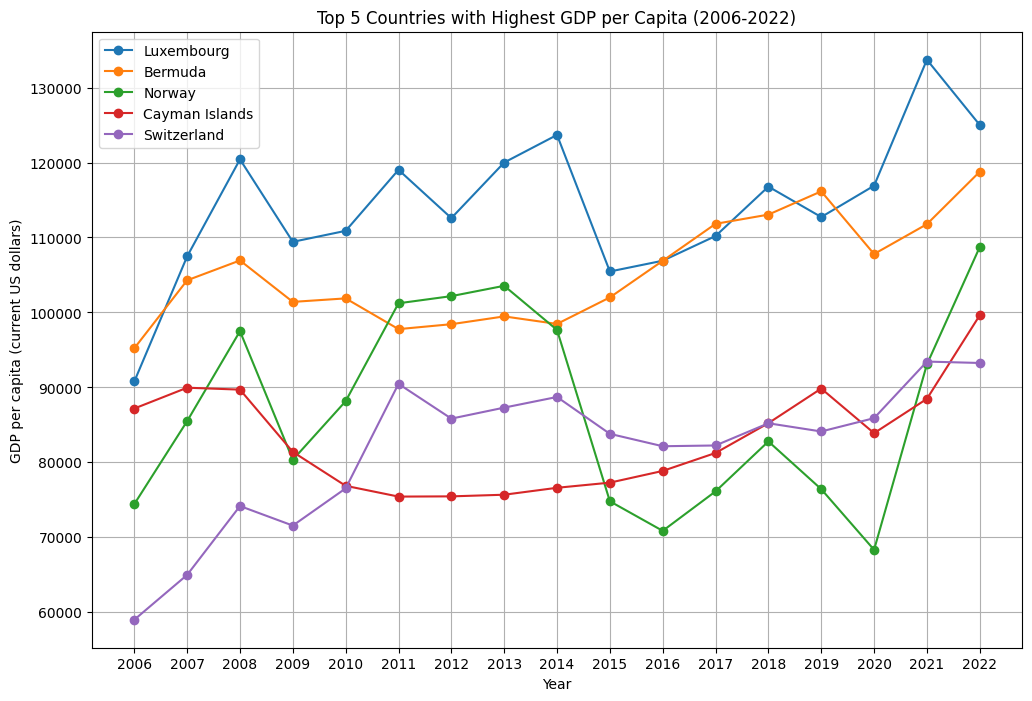

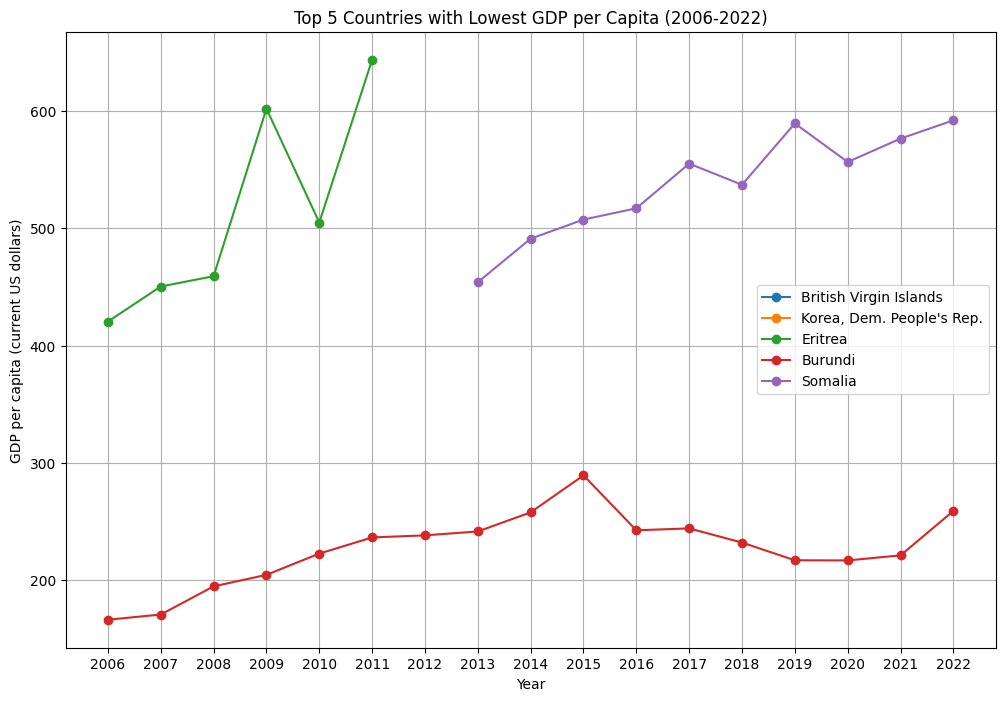

In [ ]:
# To calculate total GDP, group the data by country
country_gdp = df.groupby('country')['NY.GDP.PCAP.CD'].sum()

# Select the top 5 countries with the highest GDP
top_5_countries = country_gdp.nlargest(5).index.tolist()

# Select the bottom 5 countries with the lowest GDP
bottom_5_countries = country_gdp.nsmallest(5).index.tolist()

# Get the GDP data for the top 5 countries
top_5_data = df[df['country'].isin(top_5_countries)]
# Get the GDP data for the bottom 5 countries
bottom_5_data = df[df['country'].isin(bottom_5_countries)]

# Plot the GDP graph for the top 5 countries
plt.figure(figsize=(12, 8))
for country_code in top_5_countries:
    country_data = top_5_data[top_5_data['country'] == country_code]
    plt.plot(country_data['year'], country_data['NY.GDP.PCAP.CD'], label=country_code, marker='o')

plt.title('Top 5 Countries with Highest GDP per Capita (2006-2022)')
plt.xlabel('Year')
plt.ylabel('GDP per capita (current US dollars)')
plt.legend()
plt.grid(True)
plt.gca().invert_xaxis()
plt.show()

# Plot the GDP graph for the bottom 5 countries
plt.figure(figsize=(12, 8))
for country_code in bottom_5_countries:
    country_data = bottom_5_data[bottom_5_data['country'] == country_code]
    plt.plot(country_data['year'], country_data['NY.GDP.PCAP.CD'], label=country_code, marker='o')

plt.title('Top 5 Countries with Lowest GDP per Capita (2006-2022)')
plt.xlabel('Year')
plt.ylabel('GDP per capita (current US dollars)')
plt.legend()
plt.grid(True)
plt.gca().invert_xaxis()
plt.show()


In [ ]:
# Check if data for "Korea Dem Rep" exists in the DataFrame
korea_dem_rep_data = df[df['country'] == 'Korea, Dem. Rep']
print(korea_dem_rep_data)


Empty DataFrame
Columns: [country, year, NY.GDP.PCAP.CD]
Index: []


In [ ]:
damage=pd.read_excel('/content/sample_data/public_emdat_custom_request_2024-04-23_7187c887-7918-4c47-bd0c-a9378dade700.xlsx', sheet_name='EM-DAT Data')

In [ ]:
damage.head()

,DisNo.,Historic,Classification Key,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,External IDs,Event Name,ISO,...,Reconstruction Costs ('000 US$),"Reconstruction Costs, Adjusted ('000 US$)",Insured Damage ('000 US$),"Insured Damage, Adjusted ('000 US$)",Total Damage ('000 US$),Total Damage,CPI,Admin Units,Entry Date,Last Update
0,1999-9388-DJI,No,nat-cli-dro-dro,Natural,Climatological,Drought,Drought,NaN,NaN,DJI,...,NaN,NaN,NaN,NaN,NaN,NaN,60.503579,"[{""adm1_code"":1093,""adm1_name"":""Ali Sabieh""},{...",2006-03-01,2023-09-25
1,1999-9388-SDN,No,nat-cli-dro-dro,Natural,Climatological,Drought,Drought,NaN,NaN,SDN,...,NaN,NaN,NaN,NaN,NaN,NaN,58.840648,"[{""adm1_code"":2757,""adm1_name"":""Northern Darfu...",2006-03-08,2023-09-25
2,1999-9388-SOM,No,nat-cli-dro-dro,Natural,Climatological,Drought,Drought,NaN,NaN,SOM,...,NaN,NaN,NaN,NaN,NaN,NaN,58.840648,"[{""adm1_code"":2691,""adm1_name"":""Bay""},{""adm1_c...",2006-03-08,2023-09-25
3,2000-0002-AGO,No,nat-hyd-flo-riv,Natural,Hydrological,Flood,Riverine flood,NaN,NaN,AGO,...,NaN,NaN,NaN,NaN,10000.0,16995.0,58.840648,"[{""adm2_code"":4214,""adm2_name"":""Baia Farta""},{...",2005-02-03,2023-09-25
4,2000-0003-BGD,No,nat-met-ext-col,Natural,Meteorological,Extreme temperature,Cold wave,NaN,NaN,BGD,...,NaN,NaN,NaN,NaN,NaN,NaN,58.840648,"[{""adm1_code"":575,""adm1_name"":""Barisal""},{""adm...",2003-07-01,2023-09-25


In [ ]:
damage.columns

Index(['DisNo.', 'Historic', 'Classification Key', 'Disaster Group',
       'Disaster Subgroup', 'Disaster Type', 'Disaster Subtype',
       'External IDs', 'Event Name', 'ISO', 'Country', 'Subregion', 'Region',
       'Location', 'Origin', 'Associated Types', 'OFDA/BHA Response', 'Appeal',
       'Declaration', 'AID Contribution ('000 US$)', 'Magnitude',
       'Magnitude Scale', 'Latitude', 'Longitude', 'River Basin', 'Start Year',
       'Start Month', 'Start Day', 'End Year', 'End Month', 'End Day',
       'Total Deaths', 'No. Injured', 'No. Affected', 'No. Homeless',
       'Total Affected', 'Reconstruction Costs ('000 US$)',
       'Reconstruction Costs, Adjusted ('000 US$)',
       'Insured Damage ('000 US$)', 'Insured Damage, Adjusted ('000 US$)',
       'Total Damage ('000 US$)', 'Total Damage', 'CPI', 'Admin Units',
       'Entry Date', 'Last Update'],
      dtype='object')

In [ ]:
damage['Country'].unique()

array(['Djibouti', 'Sudan', 'Somalia', 'Angola', 'Bangladesh',
       'Guatemala', 'Iran (Islamic Republic of)', 'Mozambique',
       'South Africa', 'Brazil', 'India', 'United States of America',
       'Romania', 'Bulgaria', 'China', 'Réunion', 'Philippines',
       'Botswana', 'Mongolia', 'Russian Federation', 'Congo',
       'Afghanistan', 'Ethiopia', 'United Republic of Tanzania',
       'Lesotho', 'Kenya', 'Bosnia and Herzegovina', 'Iceland', 'Namibia',
       'Colombia', 'Indonesia', 'Zimbabwe', 'Egypt', 'Israel', 'Jordan',
       'Eswatini', 'Australia', 'Zambia', 'Madagascar', 'Nigeria',
       'Mexico', 'Argentina', 'Malawi', 'Pakistan',
       'Democratic Republic of the Congo', 'Peru',
       'Bolivia (Plurinational State of)', 'Chad', 'Austria', 'Niger',
       'Malaysia', 'Cameroon', 'Czechia', 'Japan',
       'Central African Republic', 'Benin', 'Türkiye', 'Hungary',
       'Republic of Korea', 'Serbia Montenegro', 'Ecuador',
       'Saudi Arabia', 'Honduras', 'French Gu

In [ ]:
unique_countries = damage['Country'].unique()
# Filter disaster data based on country names
filtered_disaster_df = damage[damage['Country'].isin(unique_countries)]

# Select required columns
required_columns = ['Disaster Group', 'Disaster Type', 'Country', 'Region', 'Start Year', 'End Year', 'Total Deaths', 'Total Affected', 'Total Damage']
filtered_disaster_df = filtered_disaster_df[required_columns]

# Display the new DataFrame
filtered_disaster_df

,Disaster Group,Disaster Type,Country,Region,Start Year,End Year,Total Deaths,Total Affected,Total Damage
0,Natural,Drought,Djibouti,Africa,2001,2001,NaN,100000.0,NaN
1,Natural,Drought,Sudan,Africa,2000,2001,NaN,2000000.0,NaN
2,Natural,Drought,Somalia,Africa,2000,2001,21.0,1200000.0,NaN
3,Natural,Flood,Angola,Africa,2000,2000,31.0,70000.0,16995.0
4,Natural,Extreme temperature,Bangladesh,Asia,2000,2000,49.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
10006,Natural,Flood,Oman,Asia,2024,2024,20.0,1200.0,NaN
10007,Natural,Mass movement (wet),Democratic Republic of the Congo,Africa,2024,2024,75.0,NaN,NaN
10008,Natural,Drought,Colombia,Americas,2024,2024,NaN,47597.0,NaN
10009,Natural,Drought,Zambia,Africa,2024,2024,NaN,5000000.0,NaN


In [ ]:
damage_countries = damage['Country'].unique()
common_countries = np.intersect1d(damage_countries, df_unique)
common_countries


array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czechia',
       'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'French Polynesia', 'Gabon', 'Georgia', 'Germany', 'Ghana',
       'Greece', 'Grenada', 'Guam', 'Guatemala', 'Guinea',
       'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hungary

In [ ]:
df.rename(columns={'country': 'Country'}, inplace=True)

In [ ]:
df.head()

,Country,year,NY.GDP.PCAP.CD
0,Djibouti,2022,3136.112768
1,Djibouti,2021,3062.551482
2,Djibouti,2020,2921.738706
3,Djibouti,2019,2876.043664
4,Djibouti,2018,2755.838293


In [ ]:
filtered_disaster_df.head()

,Disaster Group,Disaster Type,Country,Region,Start Year,End Year,Total Deaths,Total Affected,Total Damage
0,Natural,Drought,Djibouti,Africa,2001,2001,NaN,100000.0,NaN
1,Natural,Drought,Sudan,Africa,2000,2001,NaN,2000000.0,NaN
2,Natural,Drought,Somalia,Africa,2000,2001,21.0,1200000.0,NaN
3,Natural,Flood,Angola,Africa,2000,2000,31.0,70000.0,16995.0
4,Natural,Extreme temperature,Bangladesh,Asia,2000,2000,49.0,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3468 entries, 0 to 16
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         3468 non-null   object 
 1   year            3468 non-null   object 
 2   NY.GDP.PCAP.CD  3367 non-null   float64
dtypes: float64(1), object(2)
memory usage: 237.4+ KB


In [ ]:
filtered_disaster_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10011 entries, 0 to 10010
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Disaster Group  10011 non-null  object 
 1   Disaster Type   10011 non-null  object 
 2   Country         10011 non-null  object 
 3   Region          10011 non-null  object 
 4   Start Year      10011 non-null  int64  
 5   End Year        10011 non-null  int64  
 6   Total Deaths    7118 non-null   float64
 7   Total Affected  8052 non-null   float64
 8   Total Damage    2984 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 704.0+ KB


In [ ]:
# Prepare damage_data by selecting 'Start Year' as the year of interest
filtered_disaster_df['year'] = filtered_disaster_df['Start Year']
filtered_disaster_df = filtered_disaster_df.drop(columns=['Start Year', 'End Year'])
# Convert the 'year' column in both datasets to integers
filtered_disaster_df['year'] = filtered_disaster_df['year'].astype(int)
df['year'] = df['year'].astype(int)


In [ ]:
# Merge the datasets
combined_df = pd.merge(filtered_disaster_df, df, on=['Country', 'year'], how='outer')


In [ ]:
combined_df.head()

,Disaster Group,Disaster Type,Country,Region,Total Deaths,Total Affected,Total Damage,year,NY.GDP.PCAP.CD
0,Natural,Drought,Djibouti,Africa,NaN,100000.0,NaN,2001,NaN
1,Natural,Drought,Sudan,Africa,NaN,2000000.0,NaN,2000,NaN
2,Natural,Epidemic,Sudan,Africa,186.0,2363.0,NaN,2000,NaN
3,Natural,Drought,Somalia,Africa,21.0,1200000.0,NaN,2000,NaN
4,Natural,Epidemic,Somalia,Africa,230.0,2232.0,NaN,2000,NaN


In [ ]:
combined_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Total Deaths,7130.0,2.164512e+02,4.112359e+03,0.000000,4.000000,12.000000,34.000000,2.225700e+05
Total Affected,8072.0,5.665755e+05,6.398469e+06,1.000000,600.000000,5016.000000,50000.000000,3.300000e+08
Total Damage,2988.0,1.384350e+06,8.078477e+06,0.000000,20394.000000,132342.000000,671056.000000,2.732184e+08
year,11757.0,2.011621e+03,6.961288e+00,2000.000000,2006.000000,2012.000000,2018.000000,2.024000e+03
NY.GDP.PCAP.CD,7192.0,1.166063e+04,1.777519e+04,166.276245,1576.302615,4308.319517,11325.583112,1.337118e+05


In [ ]:
combined_df.isna().sum()

Disaster Group    1718
Disaster Type     1718
Country              0
Region            1718
Total Deaths      4627
Total Affected    3685
Total Damage      8769
year                 0
NY.GDP.PCAP.CD    4565
dtype: int64

In [ ]:
combined_df.rename(columns={ 'year' : 'Year'}, inplace=True)

In [ ]:
combined_df.rename(columns={ 'NY.GDP.PCAP.CD' : 'GDP'}, inplace=True)

In [ ]:
combined_df.head(15)

,Disaster Group,Disaster Type,Country,Region,Total Deaths,Total Affected,Total Damage,Year,GDP
0,Natural,Drought,Djibouti,Africa,NaN,100000.0,NaN,2001,NaN
1,Natural,Drought,Sudan,Africa,NaN,2000000.0,NaN,2000,NaN
2,Natural,Epidemic,Sudan,Africa,186.0,2363.0,NaN,2000,NaN
3,Natural,Drought,Somalia,Africa,21.0,1200000.0,NaN,2000,NaN
4,Natural,Epidemic,Somalia,Africa,230.0,2232.0,NaN,2000,NaN
5,Natural,Epidemic,Somalia,Africa,54.0,NaN,NaN,2000,NaN
6,Natural,Epidemic,Somalia,Africa,390.0,NaN,NaN,2000,NaN
7,Natural,Flood,Somalia,Africa,NaN,3500.0,NaN,2000,NaN
8,Natural,Flood,Somalia,Africa,NaN,220000.0,NaN,2000,NaN
9,Natural,Epidemic,Somalia,Africa,14.0,258.0,NaN,2000,NaN


In [ ]:
djibouti_data = combined_df.loc[combined_df['Country'] == 'Djibouti'].sort_values(by='Year', ascending=True)
djibouti_data

,Disaster Group,Disaster Type,Country,Region,Total Deaths,Total Affected,Total Damage,Year,GDP
455,Natural,Epidemic,Djibouti,Africa,4.0,419.0,NaN,2000,NaN
0,Natural,Drought,Djibouti,Africa,NaN,100000.0,NaN,2001,NaN
2100,Natural,Flood,Djibouti,Africa,51.0,100000.0,NaN,2004,NaN
2809,Natural,Drought,Djibouti,Africa,NaN,150000.0,NaN,2005,NaN
10048,NaN,NaN,Djibouti,NaN,NaN,NaN,NaN,2006,907.817944
3680,Natural,Drought,Djibouti,Africa,NaN,42750.0,NaN,2007,980.031032
3679,Natural,Epidemic,Djibouti,Africa,6.0,562.0,NaN,2007,980.031032
4092,Natural,Drought,Djibouti,Africa,NaN,340000.0,NaN,2008,1131.635726
10047,NaN,NaN,Djibouti,NaN,NaN,NaN,NaN,2009,1164.251683
4928,Natural,Drought,Djibouti,Africa,NaN,200258.0,NaN,2010,1227.820853


In [ ]:
# Median imputation
median_value = combined_df['Total Deaths'].median()
combined_df['Total Deaths'].fillna(median_value, inplace=True)

# For categorical data, you might use mode imputation
mode_value = combined_df['Disaster Type'].mode()[0]
combined_df['Disaster Type'].fillna(mode_value, inplace=True)

# Use transform to apply a lambda function filling NaN with the mode of the group
combined_df['Region'] = combined_df.groupby('Country')['Region'].transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else np.nan))



In [ ]:
def fill_region(group):
    if pd.isna(group['Region']).all():  # Check if all values are NaN
        return group['Region'].fillna('Unknown')  # Or any other default value you think is appropriate
    else:
        mode_value = group['Region'].mode()
        if not mode_value.empty:
            return group['Region'].fillna(mode_value[0])
        else:
            return group['Region'].fillna('Unknown')  # Fallback if mode computation fails

# Apply the function to each group
combined_df['Region'] = combined_df.groupby('Country').apply(fill_region).reset_index(level=0, drop=True)


In [ ]:
djibouti_data

,Disaster Group,Disaster Type,Country,Region,Total Deaths,Total Affected,Total Damage,Year,GDP
455,Natural,Epidemic,Djibouti,Africa,4.0,419.0,NaN,2000,NaN
0,Natural,Drought,Djibouti,Africa,NaN,100000.0,NaN,2001,NaN
2100,Natural,Flood,Djibouti,Africa,51.0,100000.0,NaN,2004,NaN
2809,Natural,Drought,Djibouti,Africa,NaN,150000.0,NaN,2005,NaN
10048,NaN,NaN,Djibouti,NaN,NaN,NaN,NaN,2006,907.817944
3680,Natural,Drought,Djibouti,Africa,NaN,42750.0,NaN,2007,980.031032
3679,Natural,Epidemic,Djibouti,Africa,6.0,562.0,NaN,2007,980.031032
4092,Natural,Drought,Djibouti,Africa,NaN,340000.0,NaN,2008,1131.635726
10047,NaN,NaN,Djibouti,NaN,NaN,NaN,NaN,2009,1164.251683
4928,Natural,Drought,Djibouti,Africa,NaN,200258.0,NaN,2010,1227.820853


In [ ]:
# Step 1: Define a function to obtain the mode or a default value
def get_mode_or_default(x):
    mode_val = x.mode()
    if mode_val.empty:
        return 'Unknown'  # Default value if no mode found
    else:
        return mode_val[0]

# Step 2: Apply this function to get the mode (or default) for each country
region_mode = combined_df.groupby('Country')['Region'].transform(get_mode_or_default)

# Step 3: Fill NaN values in 'Region' using the mode (or default) obtained
combined_df['Region'] = combined_df['Region'].fillna(region_mode)

# Print results for Djibouti to verify
combined_df


,Disaster Group,Disaster Type,Country,Region,Total Deaths,Total Affected,Total Damage,Year,GDP
0,Natural,Drought,Djibouti,Africa,12.0,100000.0,NaN,2001,NaN
1,Natural,Drought,Sudan,Africa,12.0,2000000.0,NaN,2000,NaN
2,Natural,Epidemic,Sudan,Africa,186.0,2363.0,NaN,2000,NaN
3,Natural,Drought,Somalia,Africa,21.0,1200000.0,NaN,2000,NaN
4,Natural,Epidemic,Somalia,Africa,230.0,2232.0,NaN,2000,NaN
...,...,...,...,...,...,...,...,...,...
11752,NaN,Flood,Malta,Europe,12.0,NaN,NaN,2010,21798.914294
11753,NaN,Flood,Malta,Europe,12.0,NaN,NaN,2009,21083.277053
11754,NaN,Flood,Malta,Europe,12.0,NaN,NaN,2008,22205.356771
11755,NaN,Flood,Malta,Europe,12.0,NaN,NaN,2007,19485.871153


In [ ]:
combined_df.loc[10048]

Disaster Group           NaN
Disaster Type          Flood
Country             Djibouti
Region                Africa
Total Deaths            12.0
Total Affected           NaN
Total Damage             NaN
Year                    2006
GDP               907.817944
Name: 10048, dtype: object

In [ ]:
# Impute with median for 'Total Deaths' and 'Total Affected'
combined_df['Total Deaths'] = combined_df['Total Deaths'].fillna(combined_df['Total Deaths'].median())
combined_df['Total Affected'] = combined_df['Total Affected'].fillna(combined_df['Total Affected'].median())


In [ ]:
combined_df

,Disaster Group,Disaster Type,Country,Region,Total Deaths,Total Affected,Total Damage,Year,GDP
0,Natural,Drought,Djibouti,Africa,12.0,100000.0,NaN,2001,NaN
1,Natural,Drought,Sudan,Africa,12.0,2000000.0,NaN,2000,NaN
2,Natural,Epidemic,Sudan,Africa,186.0,2363.0,NaN,2000,NaN
3,Natural,Drought,Somalia,Africa,21.0,1200000.0,NaN,2000,NaN
4,Natural,Epidemic,Somalia,Africa,230.0,2232.0,NaN,2000,NaN
...,...,...,...,...,...,...,...,...,...
11752,NaN,Flood,Malta,Europe,12.0,5016.0,NaN,2010,21798.914294
11753,NaN,Flood,Malta,Europe,12.0,5016.0,NaN,2009,21083.277053
11754,NaN,Flood,Malta,Europe,12.0,5016.0,NaN,2008,22205.356771
11755,NaN,Flood,Malta,Europe,12.0,5016.0,NaN,2007,19485.871153


In [ ]:
# Forward fill and backward fill as a combined approach
combined_df['GDP'] = combined_df['GDP'].fillna(method='ffill').fillna(method='bfill')


In [ ]:
# Impute missing 'Total Damage' based on the median of each 'Disaster Type'
combined_df['Total Damage'] = combined_df.groupby('Disaster Type')['Total Damage'].transform(lambda x: x.fillna(x.median()))



/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [ ]:
combined_df.isna().sum()

Disaster Group    1718
Disaster Type        0
Country              0
Region               0
Total Deaths         0
Total Affected       0
Total Damage       894
Year                 0
GDP                  0
dtype: int64

                Total Deaths  Total Affected  Total Damage       GDP      Year
Total Deaths        1.000000        0.035725      0.138136 -0.010022 -0.012691
Total Affected      0.035725        1.000000      0.084328 -0.026325 -0.017590
Total Damage        0.138136        0.084328      1.000000  0.033427  0.005347
GDP                -0.010022       -0.026325      0.033427  1.000000  0.145037
Year               -0.012691       -0.017590      0.005347  0.145037  1.000000


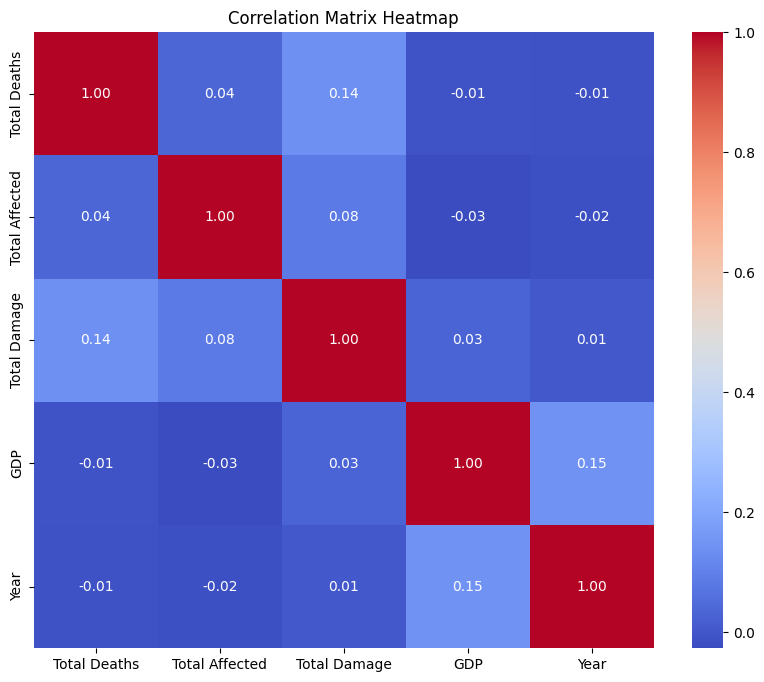

In [ ]:
selected_columns = combined_df[['Total Deaths', 'Total Affected', 'Total Damage', 'GDP', 'Year']]
# Calculate the correlation matrix
correlation_matrix = selected_columns.corr()
print(correlation_matrix)

# Plot the heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

## Correlation Matrix Analysis

The correlation matrix provided shows the linear relationships between the variables 'Total Deaths', 'Total Affected', 'Total Damage', 'GDP', and 'Year'. Here's a detailed interpretation of the correlation coefficients:

1. **Correlations involving 'Total Deaths'**:
   - **With 'Total Affected'**: The correlation coefficient of 0.036 indicates a very weak, almost negligible linear relationship.
   - **With 'Total Damage'**: The correlation coefficient of 0.138 suggests a low positive linear relationship, implying that as total damage increases, total deaths might increase slightly.
   - **With 'GDP'**: The correlation coefficient of -0.010 is nearly zero, indicating no linear relationship.
   - **With 'Year'**: The correlation coefficient of -0.013 is also near zero, suggesting no significant change in total deaths over the years.

2. **Correlations involving 'Total Affected'**:
   - **With 'Total Damage'**: The correlation coefficient of 0.084 indicates a weak positive linear relationship.
   - **With 'GDP'**: The correlation coefficient of -0.026 is close to zero, indicating no significant linear relationship.
   - **With 'Year'**: The correlation coefficient of -0.018 is nearly zero, suggesting no significant trend in total affected over the years.

3. **Correlations involving 'Total Damage'**:
   - **With 'GDP'**: The correlation coefficient of 0.033 indicates a very weak positive linear relationship.
   - **With 'Year'**: The correlation coefficient of 0.005 is almost negligible, suggesting no significant trend in total damage over the years.

4. **Correlation between 'GDP' and 'Year'**:
   - The correlation coefficient of 0.145 indicates a weak positive linear relationship, suggesting that GDP might be increasing over the years.

Overall, the correlation coefficients are generally very low, indicating that there are no strong linear relationships between these variables. This could imply that the dataset might be influenced by various factors not captured in this analysis or that different types of analysis might be more appropriate to understand these relationships better.


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Prepare the data
data_with_damage = combined_df.dropna(subset=['Total Damage'])
data_missing_damage = combined_df[combined_df['Total Damage'].isnull()]

# Define features and target
features = data_with_damage[['Total Deaths', 'Total Affected']]
target = data_with_damage['Total Damage']

# Split data for training and validation
X_train, X_val, y_train, y_val = train_test_split(features, target, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict missing values
predicted_damage = model.predict(data_missing_damage[['Total Deaths', 'Total Affected']])
combined_df.loc[combined_df['Total Damage'].isnull(), 'Total Damage'] = predicted_damage


In [ ]:
combined_df.isna().sum()

Disaster Group    1718
Disaster Type        0
Country              0
Region               0
Total Deaths         0
Total Affected       0
Total Damage         0
Year                 0
GDP                  0
dtype: int64

In [ ]:
combined_df['Disaster Group'].unique()

array(['Natural', nan], dtype=object)

In [ ]:
combined_df = combined_df.drop('Disaster Group', axis=1)


In [ ]:
combined_df.head(15)

,Disaster Type,Country,Region,Total Deaths,Total Affected,Total Damage,Year,GDP
0,Drought,Djibouti,Africa,12.0,100000.0,548711.000000,2001,4523.146558
1,Drought,Sudan,Africa,12.0,2000000.0,548711.000000,2000,4523.146558
2,Epidemic,Sudan,Africa,186.0,2363.0,494139.690602,2000,4523.146558
3,Drought,Somalia,Africa,21.0,1200000.0,548711.000000,2000,4523.146558
4,Epidemic,Somalia,Africa,230.0,2232.0,505723.070527,2000,4523.146558
5,Epidemic,Somalia,Africa,54.0,5016.0,459524.036785,2000,4523.146558
6,Epidemic,Somalia,Africa,390.0,5016.0,548038.466722,2000,4523.146558
7,Flood,Somalia,Africa,12.0,3500.0,87304.000000,2000,4523.146558
8,Flood,Somalia,Africa,12.0,220000.0,87304.000000,2000,4523.146558
9,Epidemic,Somalia,Africa,14.0,258.0,448703.470060,2000,4523.146558


In [ ]:
combined_df.isna().sum()

Disaster Type     0
Country           0
Region            0
Total Deaths      0
Total Affected    0
Total Damage      0
Year              0
GDP               0
dtype: int64

In [ ]:
co2_data= pd.read_csv('/content/sample_data/API_EN.ATM.CO2E.KT_DS2_en_csv_v2_99.csv')
co2_data

,Country,Country Code,Indicator Name,2000,2001,2002,2003,2004,2005,2006,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,CO2 emissions (kt),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,CO2 emissions (kt),357967.510652,395061.523617,406488.162257,428637.779164,459742.334363,460840.910225,467829.222212,...,591680.972,576265.992,580219.242,590905.482,598720.9575,610723.50,544952.503,NaN,NaN,NaN
2,Afghanistan,AFG,CO2 emissions (kt),1078.120000,1088.638000,1403.030000,1653.207000,1292.307000,1961.711000,2283.680000,...,9281.340,10057.590,9294.930,10022.780,10972.3800,11238.83,8709.470,NaN,NaN,NaN
3,Africa Western and Central,AFW,CO2 emissions (kt),140653.453000,147879.420000,138656.590000,148185.467000,149751.265000,152041.539000,144266.808000,...,196343.630,194363.640,201399.220,200550.900,210618.8900,222990.35,215915.610,NaN,NaN,NaN
4,Angola,AGO,CO2 emissions (kt),16204.160000,15955.900000,15689.500000,16764.800000,17453.600000,15811.200000,16558.600000,...,29610.500,31648.900,29520.700,25064.800,23637.4000,24382.90,19814.500,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,CO2 emissions (kt),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,"Yemen, Rep.",YEM,CO2 emissions (kt),15030.500000,16065.300000,16093.700000,18699.700000,19628.800000,21105.600000,21918.500000,...,27429.900,13552.200,10035.200,9682.200,11349.8000,11194.80,9960.100,NaN,NaN,NaN
263,South Africa,ZAF,CO2 emissions (kt),284463.300000,320393.300000,331272.000000,353033.500000,379939.800000,377642.700000,379736.000000,...,448298.100,425063.100,425682.900,435214.500,439644.6000,446626.00,393241.600,NaN,NaN,NaN
264,Zambia,ZMB,CO2 emissions (kt),1807.200000,1835.280000,1922.950000,2084.200000,2106.200000,2293.100000,2177.500000,...,4686.000,4956.600,5315.300,6810.700,7857.2000,7615.70,7607.100,NaN,NaN,NaN


In [ ]:
# Melting the DataFrame
co2_long = co2_data.melt(id_vars=['Country', 'Country Code', 'Indicator Name'],
                  var_name='Year',
                  value_name='CO2 emissions (kt)')

co2_long.head(5)

,Country,Country Code,Indicator Name,Year,CO2 emissions (kt)
0,Aruba,ABW,CO2 emissions (kt),2000,NaN
1,Africa Eastern and Southern,AFE,CO2 emissions (kt),2000,357967.510652
2,Afghanistan,AFG,CO2 emissions (kt),2000,1078.120000
3,Africa Western and Central,AFW,CO2 emissions (kt),2000,140653.453000
4,Angola,AGO,CO2 emissions (kt),2000,16204.160000


In [ ]:
# Convert 'Year' to an integer
co2_long['Year'] = co2_long['Year'].astype(int)

In [ ]:
combined_df.head(5)

,Disaster Type,Country,Region,Total Deaths,Total Affected,Total Damage,Year,GDP
0,Drought,Djibouti,Africa,12.0,100000.0,548711.000000,2001,4523.146558
1,Drought,Sudan,Africa,12.0,2000000.0,548711.000000,2000,4523.146558
2,Epidemic,Sudan,Africa,186.0,2363.0,494139.690602,2000,4523.146558
3,Drought,Somalia,Africa,21.0,1200000.0,548711.000000,2000,4523.146558
4,Epidemic,Somalia,Africa,230.0,2232.0,505723.070527,2000,4523.146558


In [ ]:
# Merging the DataFrames on 'Country' and 'Year'
new_combined_df = pd.merge(combined_df, co2_long, on=['Country', 'Year'], how='inner')
new_combined_df.head(5)

,Disaster Type,Country,Region,Total Deaths,Total Affected,Total Damage,Year,GDP,Country Code,Indicator Name,CO2 emissions (kt)
0,Drought,Djibouti,Africa,12.0,100000.0,548711.000000,2001,4523.146558,DJI,CO2 emissions (kt),376.50
1,Drought,Sudan,Africa,12.0,2000000.0,548711.000000,2000,4523.146558,SDN,CO2 emissions (kt),5690.74
2,Epidemic,Sudan,Africa,186.0,2363.0,494139.690602,2000,4523.146558,SDN,CO2 emissions (kt),5690.74
3,Drought,Somalia,Africa,21.0,1200000.0,548711.000000,2000,4523.146558,SOM,CO2 emissions (kt),486.60
4,Epidemic,Somalia,Africa,230.0,2232.0,505723.070527,2000,4523.146558,SOM,CO2 emissions (kt),486.60


In [ ]:
# Define the new order of the columns
new_order = ['Country Code', 'Country', 'Region','Year', 'Disaster Type',
             'Total Deaths', 'Total Affected', 'Total Damage', 'GDP',
             'Indicator Name', 'CO2 emissions (kt)']

# Reorder the columns
new_combined_df = new_combined_df[new_order]
new_combined_df

,Country Code,Country,Region,Year,Disaster Type,Total Deaths,Total Affected,Total Damage,GDP,Indicator Name,CO2 emissions (kt)
0,DJI,Djibouti,Africa,2001,Drought,12.0,100000.0,548711.000000,4523.146558,CO2 emissions (kt),376.50
1,SDN,Sudan,Africa,2000,Drought,12.0,2000000.0,548711.000000,4523.146558,CO2 emissions (kt),5690.74
2,SDN,Sudan,Africa,2000,Epidemic,186.0,2363.0,494139.690602,4523.146558,CO2 emissions (kt),5690.74
3,SOM,Somalia,Africa,2000,Drought,21.0,1200000.0,548711.000000,4523.146558,CO2 emissions (kt),486.60
4,SOM,Somalia,Africa,2000,Epidemic,230.0,2232.0,505723.070527,4523.146558,CO2 emissions (kt),486.60
...,...,...,...,...,...,...,...,...,...,...,...
9924,MLT,Malta,Europe,2010,Flood,12.0,5016.0,87304.000000,21798.914294,CO2 emissions (kt),2586.60
9925,MLT,Malta,Europe,2009,Flood,12.0,5016.0,87304.000000,21083.277053,CO2 emissions (kt),2509.90
9926,MLT,Malta,Europe,2008,Flood,12.0,5016.0,87304.000000,22205.356771,CO2 emissions (kt),2724.30
9927,MLT,Malta,Europe,2007,Flood,12.0,5016.0,87304.000000,19485.871153,CO2 emissions (kt),2715.60


In [ ]:
new_combined_df= new_combined_df.drop('Indicator Name', axis=1)

In [ ]:
new_combined_df

,Country Code,Country,Region,Year,Disaster Type,Total Deaths,Total Affected,Total Damage,GDP,CO2 emissions (kt)
0,DJI,Djibouti,Africa,2001,Drought,12.0,100000.0,548711.000000,4523.146558,376.50
1,SDN,Sudan,Africa,2000,Drought,12.0,2000000.0,548711.000000,4523.146558,5690.74
2,SDN,Sudan,Africa,2000,Epidemic,186.0,2363.0,494139.690602,4523.146558,5690.74
3,SOM,Somalia,Africa,2000,Drought,21.0,1200000.0,548711.000000,4523.146558,486.60
4,SOM,Somalia,Africa,2000,Epidemic,230.0,2232.0,505723.070527,4523.146558,486.60
...,...,...,...,...,...,...,...,...,...,...
9924,MLT,Malta,Europe,2010,Flood,12.0,5016.0,87304.000000,21798.914294,2586.60
9925,MLT,Malta,Europe,2009,Flood,12.0,5016.0,87304.000000,21083.277053,2509.90
9926,MLT,Malta,Europe,2008,Flood,12.0,5016.0,87304.000000,22205.356771,2724.30
9927,MLT,Malta,Europe,2007,Flood,12.0,5016.0,87304.000000,19485.871153,2715.60


In [ ]:
new_combined_df.isna().sum()

Country Code             0
Country                  0
Region                   0
Year                     0
Disaster Type            0
Total Deaths             0
Total Affected           0
Total Damage             0
GDP                      0
CO2 emissions (kt)    1515
dtype: int64

In [ ]:
# Calculate the median where the data is not missing
median_co2 = new_combined_df['CO2 emissions (kt)'].median()
# Fill missing values with the calculated median
new_combined_df['CO2 emissions (kt)'] = new_combined_df['CO2 emissions (kt)'].fillna(median_co2)

                    Total Deaths  Total Affected  Total Damage       GDP  \
Total Deaths            1.000000        0.034171      0.181148 -0.010519   
Total Affected          0.034171        1.000000      0.111454 -0.028387   
Total Damage            0.181148        0.111454      1.000000  0.040803   
GDP                    -0.010519       -0.028387      0.040803  1.000000   
Year                   -0.016071       -0.022349     -0.000882  0.150311   
CO2 emissions (kt)      0.004226        0.098140      0.060735 -0.031920   

                        Year  CO2 emissions (kt)  
Total Deaths       -0.016071            0.004226  
Total Affected     -0.022349            0.098140  
Total Damage       -0.000882            0.060735  
GDP                 0.150311           -0.031920  
Year                1.000000           -0.012428  
CO2 emissions (kt) -0.012428            1.000000  


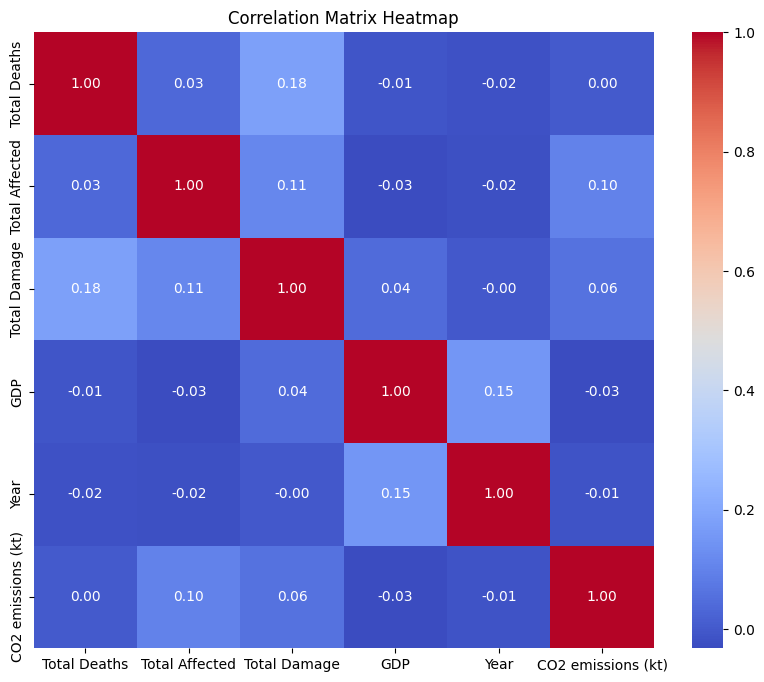

In [ ]:
selected_columns2 = new_combined_df[['Total Deaths', 'Total Affected', 'Total Damage', 'GDP', 'Year','CO2 emissions (kt)']]
correlation_matrix2 = selected_columns2.corr()
print(correlation_matrix2)

# HeatMAp
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlation_matrix2, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

## Correlation Analysis of CO2 Emissions with Other Variables

The addition of 'CO2 emissions (kt)' to the correlation matrix allows us to explore its relationship with disaster-related variables and economic indicators. Here's an analysis of the correlations involving CO2 emissions:

- **With 'Total Deaths'**: The correlation coefficient of 0.004 is extremely low, suggesting no significant linear relationship between CO2 emissions and total deaths. This indicates that CO2 emission levels do not directly relate to the immediate human fatalities recorded in the dataset.

- **With 'Total Affected'**: A correlation coefficient of 0.098 indicates a very weak positive relationship. This suggests that regions with higher CO2 emissions might slightly correlate with larger numbers of people affected by disasters, possibly reflecting higher population density or industrial activity in such areas.

- **With 'Total Damage'**: The correlation coefficient of 0.061 also indicates a very weak positive relationship. This might suggest that areas with higher CO2 emissions experience slightly higher property damage during disasters, potentially due to the higher value of infrastructure or more severe environmental impacts in these regions.

- **With 'GDP'**: A negative correlation coefficient of -0.031 suggests a very weak inverse relationship between GDP and CO2 emissions. This could imply that higher economic output slightly correlates with lower CO2 emissions per unit of GDP, possibly reflecting better efficiency or greater use of cleaner technologies in wealthier economies.

- **With 'Year'**: The negative correlation of -0.012 is negligible, indicating that there is no clear trend of CO2 emissions over the years within the scope of this dataset.

### Conclusion

The correlations between CO2 emissions and the variables studied are generally very weak. This implies that while CO2 emissions have some level of association with disaster impacts and economic activities, these relationships are not strong enough to suggest direct causality. The data may benefit from further analysis using more complex models or a broader range of environmental and economic indicators to better understand the dynamics of CO2 emissions relative to these factors.


In [ ]:
country_codes_list2 = new_combined_df['Country Code'].unique()
country_codes_list2

array(['DJI', 'SDN', 'SOM', 'AGO', 'BGD', 'GTM', 'MOZ', 'ZAF', 'BRA',
       'IND', 'ROU', 'BGR', 'CHN', 'PHL', 'BWA', 'MNG', 'RUS', 'AFG',
       'ETH', 'LSO', 'KEN', 'BIH', 'ISL', 'NAM', 'COL', 'IDN', 'ZWE',
       'ISR', 'JOR', 'SWZ', 'AUS', 'ZMB', 'MDG', 'NGA', 'MEX', 'ARG',
       'MWI', 'PAK', 'PER', 'TCD', 'AUT', 'NER', 'MYS', 'CMR', 'CZE',
       'JPN', 'CAF', 'BEN', 'HUN', 'ECU', 'SAU', 'HND', 'KAZ', 'BDI',
       'BLR', 'URY', 'GRC', 'CHL', 'GIN', 'LBR', 'HRV', 'CYP', 'UKR',
       'NIC', 'FRA', 'ESP', 'VNM', 'UGA', 'SLE', 'CRI', 'THA', 'CAN',
       'KHM', 'NPL', 'BTN', 'DZA', 'PRY', 'MAR', 'IRL', 'SEN', 'RWA',
       'MLI', 'NZL', 'LVA', 'ITA', 'SLV', 'LKA', 'PAN', 'MKD', 'BLZ',
       'CHE', 'SGP', 'NOR', 'HTI', 'TJK', 'PNG', 'AZE', 'FJI', 'TKM',
       'PRT', 'POL', 'MHL', 'CUB', 'JAM', 'UZB', 'ARM', 'GEO', 'BFA',
       'VUT', 'SYR', 'TGO', 'GHA', 'WSM', 'PRI', 'TLS', 'DEU', 'MRT',
       'DOM', 'CYM', 'GAB', 'TON', 'LTU', 'MMR', 'ALB', 'MUS', 'BEL',
       'SWE', 'OMN',

In [ ]:
# Extract unique country codes from your DataFrame
country_codes_list2 = new_combined_df['Country Code'].unique()

# Define the start and end years for the data you want to download
start_year = 2000
end_year = 2022

# Initialize an empty DataFrame to store the data
natural_GDP_df = pd.DataFrame()

# Loop through each country code
for code in country_codes_list2:
    try:
        # Download the data for a specific country using the World Bank API
        gdp_data = wb.download(indicator='NY.GDP.TOTL.RT.ZS', country=code, start=start_year, end=end_year)

        # Convert the downloaded data into a DataFrame and reset the index
        df_temp = pd.DataFrame(gdp_data.reset_index())

        # If the main DataFrame is empty, set it to the current temp DataFrame
        if natural_GDP_df.empty:
            natural_GDP_df = df_temp
        else:
            # If the main DataFrame is not empty, append the temp DataFrame to it
            natural_GDP_df = pd.concat([natural_GDP_df, df_temp])
    except ValueError:
        # Continue the loop if a country code is not found in the World Bank data
        continue

# Optional: Check the result by printing the first few rows of the DataFrame
print(natural_GDP_df.head())

    country  year  NY.GDP.TOTL.RT.ZS
0  Djibouti  2022                NaN
1  Djibouti  2021           0.277110
2  Djibouti  2020           0.322149
3  Djibouti  2019           0.358532
4  Djibouti  2018           0.278959


In [ ]:
natural_GDP_df= natural_GDP_df.rename(columns={'year':'Year'})
natural_GDP_df= natural_GDP_df.rename(columns={'country':'Country'})
natural_GDP_df.head(50)

,Country,Year,NY.GDP.TOTL.RT.ZS
0,Djibouti,2022,NaN
1,Djibouti,2021,0.277110
2,Djibouti,2020,0.322149
3,Djibouti,2019,0.358532
4,Djibouti,2018,0.278959
5,Djibouti,2017,0.571398
6,Djibouti,2016,0.484424
7,Djibouti,2015,0.662618
8,Djibouti,2014,0.788998
9,Djibouti,2013,0.526727


In [ ]:
natural_GDP_df['Year'] = natural_GDP_df['Year'].astype(int)

In [ ]:
new_combined_df = pd.merge(new_combined_df, natural_GDP_df, on=['Country', 'Year'], how='inner')
new_combined_df

,Country Code,Country,Region,Year,Disaster Type,Total Deaths,Total Affected,Total Damage,GDP,CO2 emissions (kt),NY.GDP.TOTL.RT.ZS
0,DJI,Djibouti,Africa,2001,Drought,12.0,100000.0,548711.000000,4523.146558,376.50,0.415975
1,SDN,Sudan,Africa,2000,Drought,12.0,2000000.0,548711.000000,4523.146558,5690.74,10.783460
2,SDN,Sudan,Africa,2000,Epidemic,186.0,2363.0,494139.690602,4523.146558,5690.74,10.783460
3,SOM,Somalia,Africa,2000,Drought,21.0,1200000.0,548711.000000,4523.146558,486.60,NaN
4,SOM,Somalia,Africa,2000,Epidemic,230.0,2232.0,505723.070527,4523.146558,486.60,NaN
...,...,...,...,...,...,...,...,...,...,...,...
9591,MLT,Malta,Europe,2010,Flood,12.0,5016.0,87304.000000,21798.914294,2586.60,0.000000
9592,MLT,Malta,Europe,2009,Flood,12.0,5016.0,87304.000000,21083.277053,2509.90,0.004179
9593,MLT,Malta,Europe,2008,Flood,12.0,5016.0,87304.000000,22205.356771,2724.30,0.006713
9594,MLT,Malta,Europe,2007,Flood,12.0,5016.0,87304.000000,19485.871153,2715.60,0.005651


In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Prepare the data
data = new_combined_df[['Year', 'Total Deaths', 'Total Affected', 'Total Damage', 'GDP', 'CO2 emissions (kt)']].dropna()
X = data[['Year', 'Total Deaths', 'Total Affected', 'GDP', 'CO2 emissions (kt)']]  # Features
y = data['Total Damage']  # Target

# Create and fit the model
model = LinearRegression()
model.fit(X, y)

prediction_data = new_combined_df[['Year', 'Total Deaths', 'Total Affected', 'GDP', 'CO2 emissions (kt)']]

# Handling potential NaNs in prediction data (example using median for demonstration)
for column in prediction_data.columns:
    if prediction_data[column].isnull().any():
        prediction_data[column].fillna(prediction_data[column].median(), inplace=True)

new_combined_df['predict_damage_2030'] = model.predict(prediction_data)


In [ ]:
# Calculate the average predicted economic losses for 2030 for each country
projected_2030 = new_combined_df.groupby('Country Code')['predict_damage_2030'].mean().reset_index()


<ipython-input-64-220adb76966c>:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


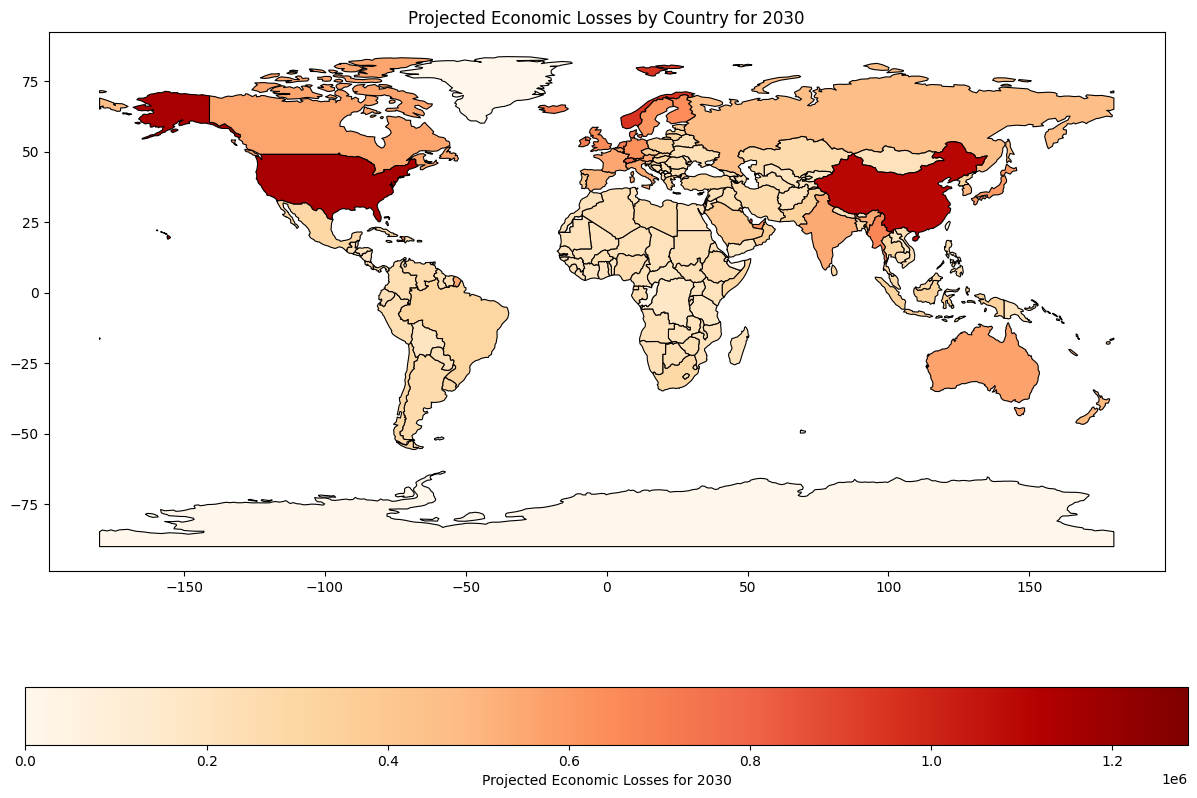

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Ensure 'Country Code' in your data is ISO Alpha-3; if not, adjust it or choose the correct column
# Merge your DataFrame with the world map using ISO Alpha-3 codes
world = world.merge(projected_2030, how="left", left_on='iso_a3', right_on='Country Code')

# Replace missing values with 0 for visualization purposes
world['predict_damage_2030'] = world['predict_damage_2030'].fillna(0)

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.plot(column='predict_damage_2030', ax=ax, cmap='OrRd', linewidth=0.8, edgecolor='black', legend=True,
           legend_kwds={'label': "Projected Economic Losses for 2030", 'orientation': "horizontal"})

ax.set_title("Projected Economic Losses by Country for 2030")
plt.show()


In [ ]:
new_combined_df

,Country Code,Country,Region,Year,Disaster Type,Total Deaths,Total Affected,Total Damage,GDP,CO2 emissions (kt),NY.GDP.TOTL.RT.ZS,predict_damage_2030
0,DJI,Djibouti,Africa,2001,Drought,12.0,100000.0,548711.000000,4523.146558,376.50,0.415975,222162.705746
1,SDN,Sudan,Africa,2000,Drought,12.0,2000000.0,548711.000000,4523.146558,5690.74,10.783460,339479.647159
2,SDN,Sudan,Africa,2000,Epidemic,186.0,2363.0,494139.690602,4523.146558,5690.74,10.783460,248199.956502
3,SOM,Somalia,Africa,2000,Drought,21.0,1200000.0,548711.000000,4523.146558,486.60,NaN,291686.332571
4,SOM,Somalia,Africa,2000,Epidemic,230.0,2232.0,505723.070527,4523.146558,486.60,NaN,255524.602546
...,...,...,...,...,...,...,...,...,...,...,...,...
9591,MLT,Malta,Europe,2010,Flood,12.0,5016.0,87304.000000,21798.914294,2586.60,0.000000,389437.327995
9592,MLT,Malta,Europe,2009,Flood,12.0,5016.0,87304.000000,21083.277053,2509.90,0.004179,382680.455983
9593,MLT,Malta,Europe,2008,Flood,12.0,5016.0,87304.000000,22205.356771,2724.30,0.006713,394968.709006
9594,MLT,Malta,Europe,2007,Flood,12.0,5016.0,87304.000000,19485.871153,2715.60,0.005651,367480.047978


<ipython-input-68-40ce95205c1f>:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


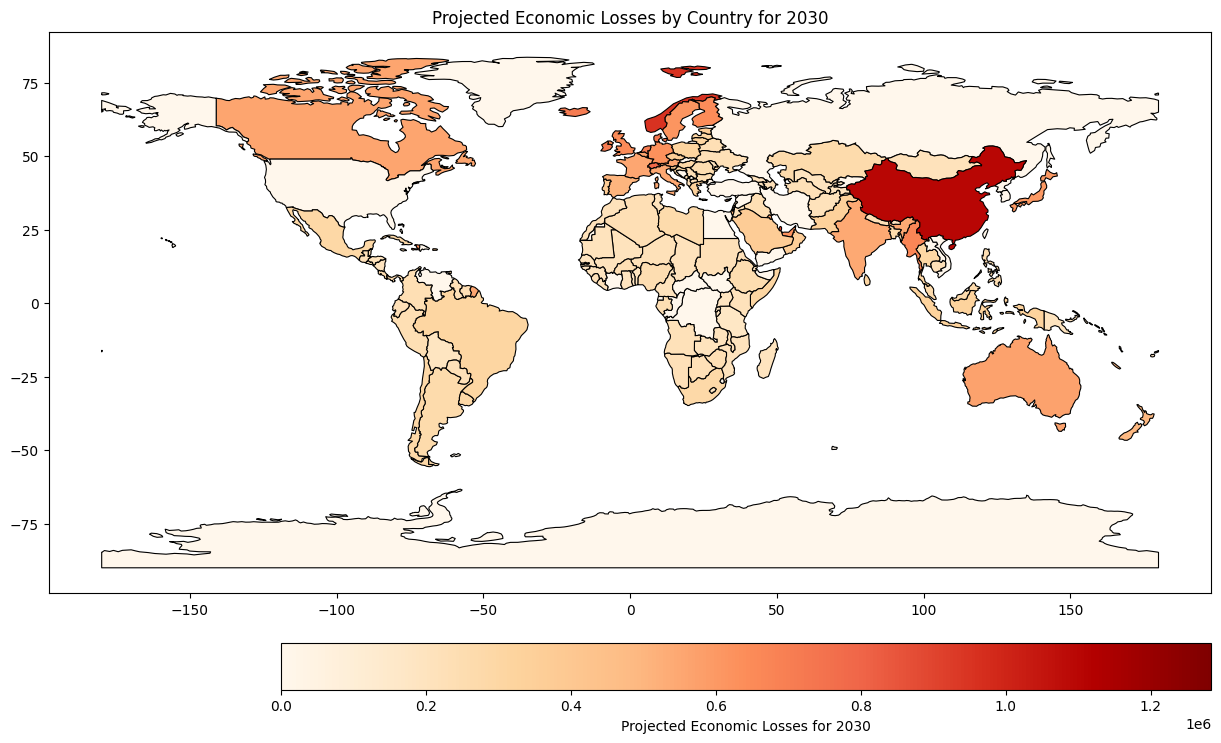

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


# Calculate average predicted damage for 2030 by country
average_predicted_damage = new_combined_df.groupby('Country')['predict_damage_2030'].mean().reset_index()

# Merge with the world GeoDataFrame
world = world.merge(average_predicted_damage, how="left", left_on="name", right_on="Country")
world['predict_damage_2030'] = world['predict_damage_2030'].fillna(0)  # Fill missing values

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.plot(column='predict_damage_2030', ax=ax, cmap='OrRd', linewidth=0.8, edgecolor='black',
           legend=True, legend_kwds={'label': "Projected Economic Losses for 2030",
                                     'orientation': "horizontal", 'shrink': 0.8, 'pad': 0.02, 'anchor': (1.0, 0.5)})

ax.set_title("Projected Economic Losses by Country for 2030")
plt.show()




In [ ]:
!pip install pycountry


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 15.0 MB/s eta 0:00:00


In [ ]:
import pycountry
# Function to get ISO Alpha-3 country codes
def get_iso_alpha_3(country):
    try:
        return pycountry.countries.get(name=country).alpha_3
    except:
        return None  # Return None if country not found

# Apply the function to the 'Country' column
new_combined_df['ISO_A3'] = new_combined_df['Country'].apply(get_iso_alpha_3)

new_combined_df


,Country Code,Country,Region,Year,Disaster Type,Total Deaths,Total Affected,Total Damage,GDP,CO2 emissions (kt),NY.GDP.TOTL.RT.ZS,predict_damage_2030,ISO_A3
0,DJI,Djibouti,Africa,2001,Drought,12.0,100000.0,548711.000000,4523.146558,376.50,0.415975,222162.705746,DJI
1,SDN,Sudan,Africa,2000,Drought,12.0,2000000.0,548711.000000,4523.146558,5690.74,10.783460,339479.647159,SDN
2,SDN,Sudan,Africa,2000,Epidemic,186.0,2363.0,494139.690602,4523.146558,5690.74,10.783460,248199.956502,SDN
3,SOM,Somalia,Africa,2000,Drought,21.0,1200000.0,548711.000000,4523.146558,486.60,NaN,291686.332571,SOM
4,SOM,Somalia,Africa,2000,Epidemic,230.0,2232.0,505723.070527,4523.146558,486.60,NaN,255524.602546,SOM
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9591,MLT,Malta,Europe,2010,Flood,12.0,5016.0,87304.000000,21798.914294,2586.60,0.000000,389437.327995,MLT
9592,MLT,Malta,Europe,2009,Flood,12.0,5016.0,87304.000000,21083.277053,2509.90,0.004179,382680.455983,MLT
9593,MLT,Malta,Europe,2008,Flood,12.0,5016.0,87304.000000,22205.356771,2724.30,0.006713,394968.709006,MLT
9594,MLT,Malta,Europe,2007,Flood,12.0,5016.0,87304.000000,19485.871153,2715.60,0.005651,367480.047978,MLT


In [ ]:
new_combined_df.isna().sum()

Country Code             0
Country                  0
Region                   0
Year                     0
Disaster Type            0
Total Deaths             0
Total Affected           0
Total Damage             0
GDP                      0
CO2 emissions (kt)       0
NY.GDP.TOTL.RT.ZS      622
predict_damage_2030      0
ISO_A3                 477
dtype: int64

In [ ]:
missing_iso = new_combined_df[new_combined_df['ISO_A3'].isnull()]


In [ ]:
def get_iso_alpha_3(country_code):
    try:
        # If the country code is 2-letter, convert it using pycountry
        if len(country_code) == 2:
            return pycountry.countries.get(alpha_2=country_code).alpha_3
        # If the country code is already 3-letter, assume it's correct or try to find by name
        elif len(country_code) == 3:
            return pycountry.countries.get(alpha_3=country_code).alpha_3
        else:
            # Attempt to find by full country name, adjust as necessary if using full names
            return pycountry.countries.lookup(country_code).alpha_3
    except:
        # Return None or some default if the ISO code can't be found
        return None

# Apply this function to the rows with missing ISO_A3
new_combined_df.loc[new_combined_df['ISO_A3'].isnull(), 'ISO_A3'] = new_combined_df['Country Code'].apply(get_iso_alpha_3)

# Check if there are still any null ISO_A3 codes
print(new_combined_df[new_combined_df['ISO_A3'].isnull()])



Empty DataFrame
Columns: [Country Code, Country, Region, Year, Disaster Type, Total Deaths, Total Affected, Total Damage, GDP, CO2 emissions (kt), NY.GDP.TOTL.RT.ZS, predict_damage_2030, ISO_A3]
Index: []


In [ ]:
new_combined_df

,Country Code,Country,Region,Year,Disaster Type,Total Deaths,Total Affected,Total Damage,GDP,CO2 emissions (kt),NY.GDP.TOTL.RT.ZS,predict_damage_2030,ISO_A3
0,DJI,Djibouti,Africa,2001,Drought,12.0,100000.0,548711.000000,4523.146558,376.50,0.415975,222162.705746,DJI
1,SDN,Sudan,Africa,2000,Drought,12.0,2000000.0,548711.000000,4523.146558,5690.74,10.783460,339479.647159,SDN
2,SDN,Sudan,Africa,2000,Epidemic,186.0,2363.0,494139.690602,4523.146558,5690.74,10.783460,248199.956502,SDN
3,SOM,Somalia,Africa,2000,Drought,21.0,1200000.0,548711.000000,4523.146558,486.60,NaN,291686.332571,SOM
4,SOM,Somalia,Africa,2000,Epidemic,230.0,2232.0,505723.070527,4523.146558,486.60,NaN,255524.602546,SOM
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9591,MLT,Malta,Europe,2010,Flood,12.0,5016.0,87304.000000,21798.914294,2586.60,0.000000,389437.327995,MLT
9592,MLT,Malta,Europe,2009,Flood,12.0,5016.0,87304.000000,21083.277053,2509.90,0.004179,382680.455983,MLT
9593,MLT,Malta,Europe,2008,Flood,12.0,5016.0,87304.000000,22205.356771,2724.30,0.006713,394968.709006,MLT
9594,MLT,Malta,Europe,2007,Flood,12.0,5016.0,87304.000000,19485.871153,2715.60,0.005651,367480.047978,MLT


In [ ]:
new_combined_df.isna().sum()

Country Code             0
Country                  0
Region                   0
Year                     0
Disaster Type            0
Total Deaths             0
Total Affected           0
Total Damage             0
GDP                      0
CO2 emissions (kt)       0
NY.GDP.TOTL.RT.ZS      622
predict_damage_2030      0
ISO_A3                   0
dtype: int64

In [ ]:
# Group by 'ISO_A3' and sum 'Total Damage' for each country
aggregated_damage = new_combined_df.groupby('ISO_A3')['Total Damage'].sum().reset_index()

# Optionally, merge this back with your main DataFrame to include country names if needed
aggregated_damage = aggregated_damage.merge(new_combined_df[['ISO_A3', 'Country']].drop_duplicates(), on='ISO_A3', how='left')

In [ ]:
import plotly.express as px

fig = px.choropleth(aggregated_damage,
                    locations="ISO_A3",
                    color="Total Damage",
                    hover_name="Country",
                    color_continuous_scale=px.colors.sequential.Redor,  # Choose a color scale
                    projection="natural earth",
                    title="Cumulative Total Damage by Country")

# Update layout to adjust the map size
fig.update_layout(
    width=1200,  # Adjust width as needed
    height=800   # Adjust height as needed
)

fig.show()


In [ ]:
import plotly.express as px

# Assuming 'df' now includes the 'ISO_A3' column and an 'Economic_Loss' column
fig = px.choropleth(new_combined_df, locations="ISO_A3",
                    color="predict_damage_2030",
                    hover_name="Country",
                    color_continuous_scale=px.colors.sequential.Plasma,
                    projection="natural earth",
                    title="Projected Risk Map by Country for 2030")

# Update layout to increase map size
fig.update_layout(
    width=1000,  # Width of the figure in pixels
    height=600   # Height of the figure in pixels
)

fig.show()



###Cumulativ Prediction

In [ ]:
new_combined_df['predict_damage_2030'] = new_combined_df['predict_damage_2030'].astype(float)  # Ensure it's the correct type for summing
cumulative_damage = new_combined_df.groupby(['Country', 'ISO_A3'])['predict_damage_2030'].sum().reset_index()
cumulative_damage.rename(columns={'predict_damage_2030': 'Cumulative Predicted Damage 2001-2030'}, inplace=True)

In [ ]:
cumulative_damage

,Country,ISO_A3,Cumulative Predicted Damage 2001-2030
0,Afghanistan,AFG,3.330158e+07
1,Albania,ALB,6.633523e+06
2,Algeria,DZA,1.205024e+07
3,American Samoa,ASM,5.699951e+06
4,Angola,AGO,1.424343e+07
...,...,...,...
197,Virgin Islands (U.S.),VIR,9.258107e+06
198,West Bank and Gaza,PSE,3.343309e+06
199,"Yemen, Rep.",YEM,2.953939e+06
200,Zambia,ZMB,7.735264e+06


In [ ]:
import geopandas as gpd
import fiona

# Set the configuration to restore SHX files
with fiona.Env(SHAPE_RESTORE_SHX='YES'):
    # Try to load the shapefile
    shapefile_path = '/content/sample_data/ne_110m_admin_0_countries.shp'
    world = gpd.read_file(shapefile_path)


In [ ]:
# Print column names of the world GeoDataFrame
print(world.columns)


Index(['geometry'], dtype='object')


In [ ]:
import geopandas as gpd

# Assuming you've correctly located the shapefile path
shapefile_path = '/content/sample_data/ne_110m_admin_0_countries.shp'
world = gpd.read_file(shapefile_path)

# After loading, check the columns again
print(world.columns)


Index(['geometry'], dtype='object')


In [ ]:
import geopandas as gpd

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
print(world.columns)


Index(['pop_est', 'continent', 'name', 'iso_a3', 'gdp_md_est', 'geometry'], dtype='object')


<ipython-input-86-6c8038ec6191>:3: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



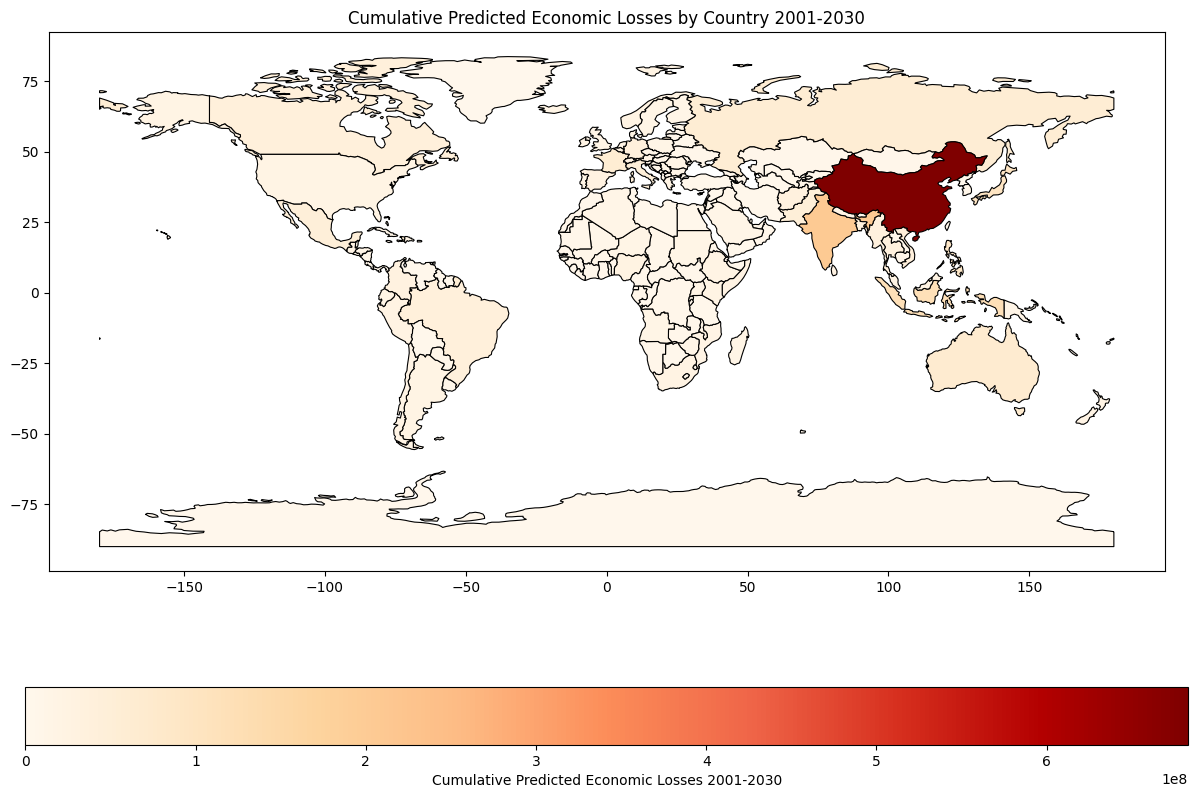

In [ ]:
# Merge the cumulative damages with the world GeoDataFrame using the ISO_A3 column
world = world.merge(cumulative_damage, how="left", left_on='iso_a3', right_on='ISO_A3')

# Replace missing values in the merged column
world['Cumulative Predicted Damage 2001-2030'] = world['Cumulative Predicted Damage 2001-2030'].fillna(0)
fig, ax = plt.subplots(1, figsize=(15, 10))
world.plot(column='Cumulative Predicted Damage 2001-2030', ax=ax, legend=True,
           legend_kwds={'label': "Cumulative Predicted Economic Losses 2001-2030", 'orientation': "horizontal"},
           cmap='OrRd', linewidth=0.8, edgecolor='black')
ax.set_title("Cumulative Predicted Economic Losses by Country 2001-2030")
plt.show()

In [ ]:
print(world['Cumulative Predicted Damage 2001-2030'].describe())
print(world.groupby('name')['Cumulative Predicted Damage 2001-2030'].sum())


count    1.770000e+02
mean     1.904392e+07
std      5.495289e+07
min      0.000000e+00
25%      5.052153e+06
50%      8.949346e+06
75%      1.658663e+07
max      6.830725e+08
Name: Cumulative Predicted Damage 2001-2030, dtype: float64
name
Afghanistan    3.330158e+07
Albania        6.633523e+06
Algeria        1.205024e+07
Angola         1.424343e+07
Antarctica     0.000000e+00
                   ...     
W. Sahara      0.000000e+00
Yemen          2.953939e+06
Zambia         7.735264e+06
Zimbabwe       1.120590e+07
eSwatini       4.608690e+06
Name: Cumulative Predicted Damage 2001-2030, Length: 177, dtype: float64


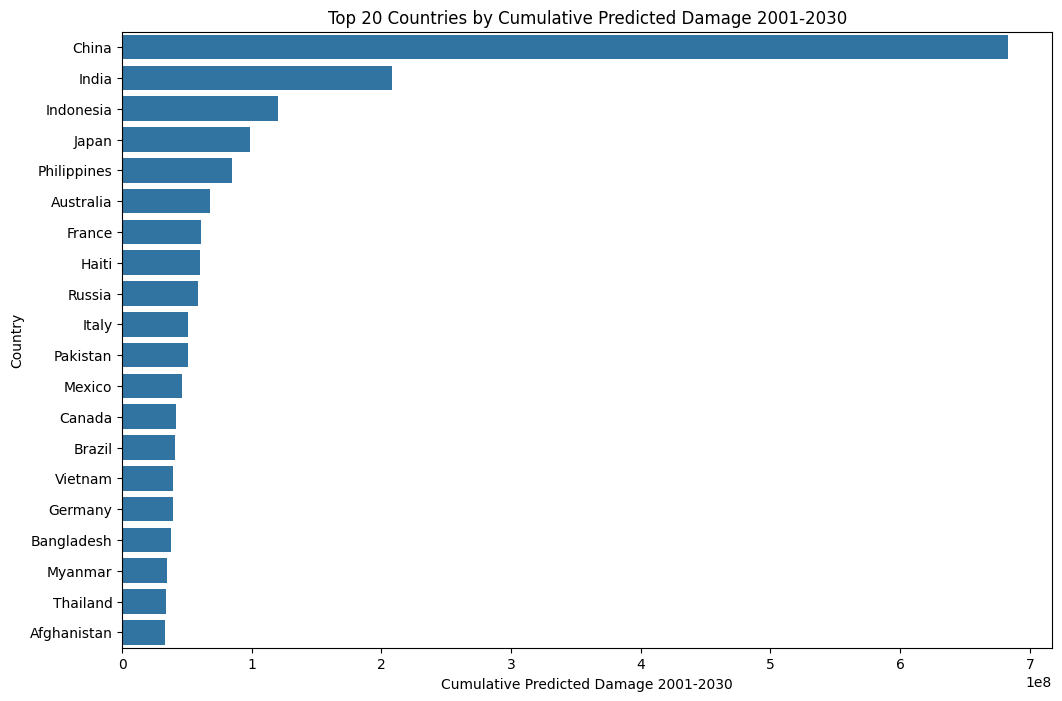

In [ ]:
# Sort values for better visualization
sorted_data = world.sort_values('Cumulative Predicted Damage 2001-2030', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Cumulative Predicted Damage 2001-2030', y='name', data=sorted_data.head(20))  # Show top 20 countries
plt.xlabel('Cumulative Predicted Damage 2001-2030')
plt.ylabel('Country')
plt.title('Top 20 Countries by Cumulative Predicted Damage 2001-2030')
plt.show()

In [ ]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Country,ISO_A3,Cumulative Predicted Damage 2001-2030
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji,FJI,7.193405e+06
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,TZA,2.914747e+06
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN,0.000000e+00
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,CAN,4.138142e+07
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",United States,USA,1.966436e+07


In [ ]:
world.columns

Index(['pop_est', 'continent', 'name', 'iso_a3', 'gdp_md_est', 'geometry',
       'Country', 'ISO_A3', 'Cumulative Predicted Damage 2001-2030'],
      dtype='object')

In [ ]:
# Assuming 'name' and 'iso_a3' are the correct columns to keep
#world = world.drop(columns=['Country', 'ISO_A3'])

In [ ]:
world['Cumulative Predicted Damage 2001-2030'] = pd.to_numeric(world['Cumulative Predicted Damage 2001-2030'], errors='coerce')
world['Cumulative Predicted Damage 2001-2030'].fillna(0, inplace=True)

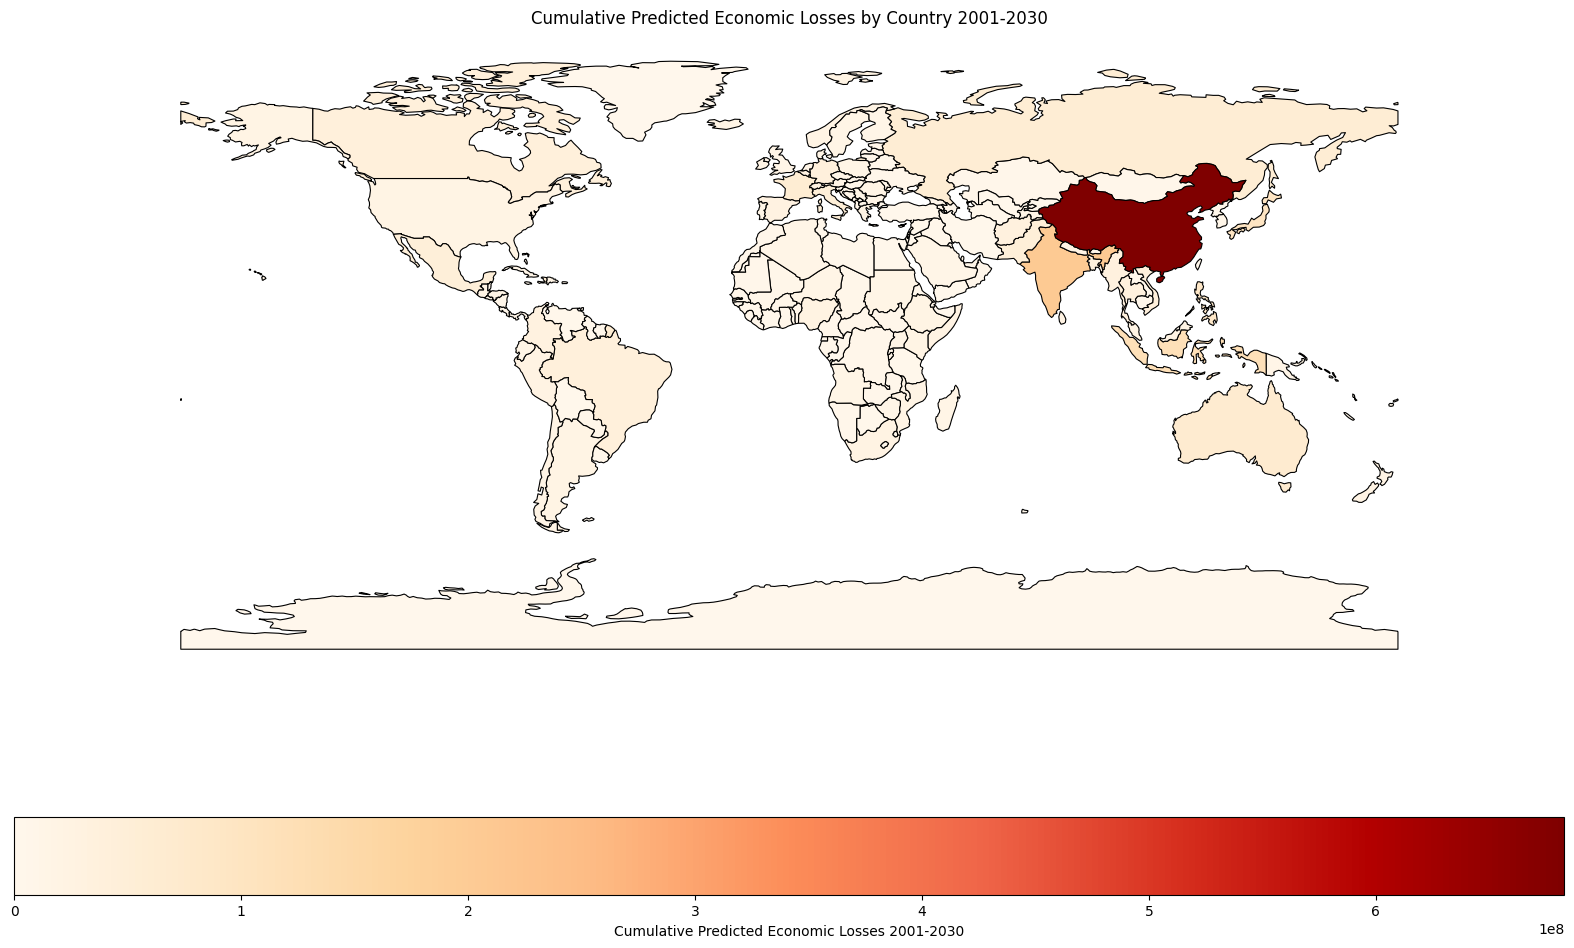

In [ ]:


fig, ax = plt.subplots(1, figsize=(20, 12))
world.plot(column='Cumulative Predicted Damage 2001-2030', ax=ax, legend=True,
           legend_kwds={'label': "Cumulative Predicted Economic Losses 2001-2030", 'orientation': "horizontal"},
           cmap='OrRd', linewidth=0.8, edgecolor='black')
ax.set_title('Cumulative Predicted Economic Losses by Country 2001-2030')
ax.set_axis_off()  # Optionally turn off the axis.
plt.show()


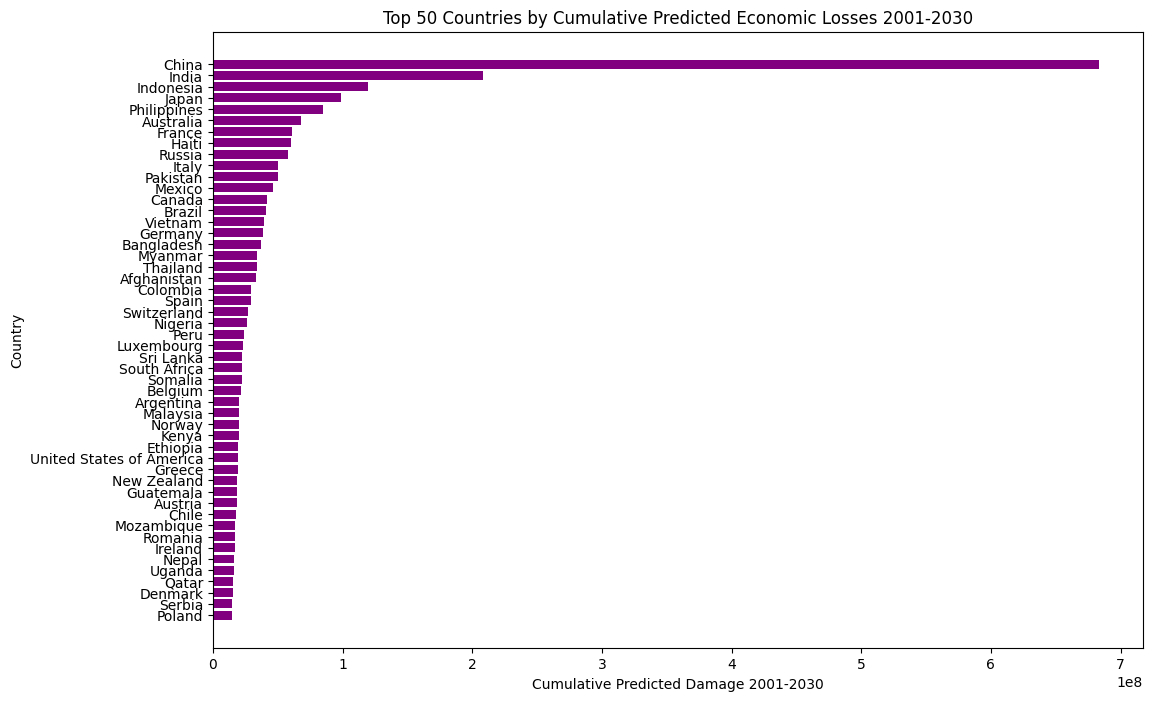

In [ ]:
# Sort data and select top 10 for visualization
top_countries = world.sort_values(by='Cumulative Predicted Damage 2001-2030', ascending=False).head(50)

plt.figure(figsize=(12, 8))
plt.barh(top_countries['name'], top_countries['Cumulative Predicted Damage 2001-2030'], color='purple')
plt.xlabel('Cumulative Predicted Damage 2001-2030')
plt.ylabel('Country')
plt.title('Top 50 Countries by Cumulative Predicted Economic Losses 2001-2030')
plt.gca().invert_yaxis()  # Invert y axis for highest on top
plt.show()


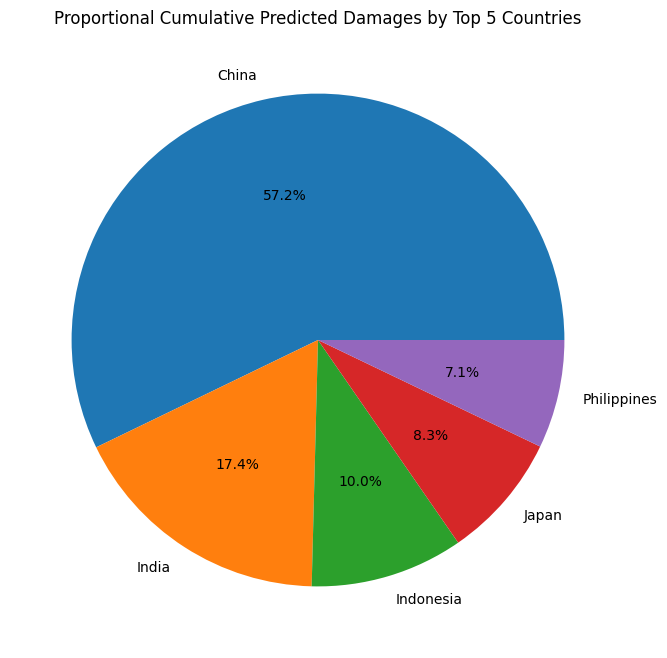

In [ ]:
# Pie chart for the top 5 countries
top_countries = world.sort_values('Cumulative Predicted Damage 2001-2030', ascending=False).head(5)
plt.figure(figsize=(8, 8))
plt.pie(top_countries['Cumulative Predicted Damage 2001-2030'], labels=top_countries['name'], autopct='%1.1f%%')
plt.title('Proportional Cumulative Predicted Damages by Top 5 Countries')
plt.show()


Cumulative Total Damage for Germany: 118129654.73106214
Cumulative Total Damage for Germany: 118129654.73106214


<ipython-input-96-94826f904495>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



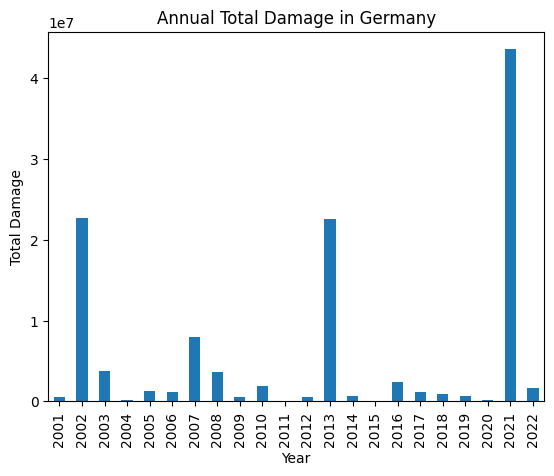

In [ ]:
# Filter the DataFrame for rows where the 'Country' column is 'Germany' or 'ISO_A3' column is 'DEU'
germany_data = new_combined_df[new_combined_df['ISO_A3'] == 'DEU']
# Calculate the cumulative total damage
cumulative_damage_germany = germany_data['Total Damage'].sum()
print(f"Cumulative Total Damage for Germany: {cumulative_damage_germany}")
# Fill missing values with zero before summing, if that's appropriate
germany_data['Total Damage'].fillna(0, inplace=True)
cumulative_damage_germany = germany_data['Total Damage'].sum()
print(f"Cumulative Total Damage for Germany: {cumulative_damage_germany}")
# Analyzing damage over the years
annual_damage = germany_data.groupby('Year')['Total Damage'].sum()
annual_damage.plot(kind='bar')
plt.title('Annual Total Damage in Germany')
plt.xlabel('Year')
plt.ylabel('Total Damage')
plt.show()


In [ ]:
# Group by 'Year' and sum 'Total Damage', then print in a formatted style
annual_damage = germany_data.groupby('Year')['Total Damage'].sum().reset_index()

# Display the formatted table
for index, row in annual_damage.iterrows():
    print(f"{row['Year']}           {row['Total Damage']}")

2001.0           495838.0
2002.0           22656611.949867208
2003.0           3725365.7811949356
2004.0           220014.0
2005.0           1271161.0
2006.0           1114796.0
2007.0           8025312.0
2008.0           3670036.0
2009.0           597992.0
2010.0           1855664.0
2011.0           87304.0
2012.0           502504.0
2013.0           22585808.0
2014.0           669479.0
2015.0           87304.0
2016.0           2438717.0
2017.0           1160644.0
2018.0           937096.0
2019.0           677500.0
2020.0           174996.0
2021.0           43551112.0
2022.0           1624400.0


In [ ]:
germany_data = new_combined_df[new_combined_df['Country'] == 'Germany']
print(germany_data)
total_damage_germany = germany_data['Total Damage'].sum()
print('Total Damage:',total_damage_germany)

     Country Code  Country  Region  Year        Disaster Type  Total Deaths  \
726           DEU  Germany  Europe  2001                Storm           6.0   
902           DEU  Germany  Europe  2002                Storm           4.0   
903           DEU  Germany  Europe  2002             Epidemic          12.0   
904           DEU  Germany  Europe  2002                Storm           7.0   
905           DEU  Germany  Europe  2002                Flood          27.0   
...           ...      ...     ...   ...                  ...           ...   
7659          DEU  Germany  Europe  2022                Storm           1.0   
7660          DEU  Germany  Europe  2022                Storm           3.0   
7661          DEU  Germany  Europe  2022                Storm           3.0   
7662          DEU  Germany  Europe  2022  Extreme temperature        8173.0   
8723          DEU  Germany  Europe  2015                Flood          12.0   

      Total Affected  Total Damage           GDP  C

In [ ]:
unknown_regions = new_combined_df[new_combined_df['Region']=='Unknown']
unknown_regions


,Country Code,Country,Region,Year,Disaster Type,Total Deaths,Total Affected,Total Damage,GDP,CO2 emissions (kt),NY.GDP.TOTL.RT.ZS,predict_damage_2030,ISO_A3
7890,IRN,"Iran, Islamic Rep.",Unknown,2022,Flood,12.0,5016.0,87304.0,4669.571380,51207.7,NaN,208708.787206,IRN
7891,IRN,"Iran, Islamic Rep.",Unknown,2021,Flood,12.0,5016.0,87304.0,4084.200305,51207.7,30.448060,203307.021037,IRN
7892,IRN,"Iran, Islamic Rep.",Unknown,2020,Flood,12.0,5016.0,87304.0,2746.419483,616561.3,23.239172,241508.777614,IRN
7893,IRN,"Iran, Islamic Rep.",Unknown,2019,Flood,12.0,5016.0,87304.0,3276.753265,625251.5,27.800666,248443.454187,IRN
7894,IRN,"Iran, Islamic Rep.",Unknown,2018,Flood,12.0,5016.0,87304.0,3850.751253,637433.7,34.239595,256147.435221,IRN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9495,MAF,St. Martin (French part),Unknown,2010,Flood,12.0,5016.0,87304.0,21344.587305,51207.7,NaN,389155.091042,MAF
9496,MAF,St. Martin (French part),Unknown,2009,Flood,12.0,5016.0,87304.0,21344.587305,51207.7,NaN,389811.371995,MAF
9497,MAF,St. Martin (French part),Unknown,2008,Flood,12.0,5016.0,87304.0,21344.587305,51207.7,NaN,390467.652948,MAF
9498,MAF,St. Martin (French part),Unknown,2007,Flood,12.0,5016.0,87304.0,21344.587305,51207.7,NaN,391123.933902,MAF


In [ ]:
unique_unknown_countries = unknown_regions['Country'].unique()
print(unique_unknown_countries)


['Iran, Islamic Rep.' 'United States' 'Congo, Dem. Rep.' 'Tanzania'
 'Egypt, Arab Rep.' 'Bolivia' 'Turkiye' 'Korea, Rep.'
 'Micronesia, Fed. Sts.' 'United Kingdom' 'Lao PDR' 'Slovak Republic'
 "Korea, Dem. People's Rep." 'Yemen, Rep.' 'Venezuela, RB'
 'Kyrgyz Republic' 'Moldova' 'Gambia, The' "Cote d'Ivoire" 'Bahamas, The'
 'St. Vincent and the Grenadines' 'Netherlands' 'Hong Kong SAR, China'
 'Macao SAR, China' 'St. Lucia' 'Virgin Islands (U.S.)'
 'West Bank and Gaza' 'St. Kitts and Nevis' 'St. Martin (French part)']


In [ ]:
corrections = {
    'Turkiye': 'Turkey',  # Correct spelling of Turkey
    'Korea, Dem. People\'s Rep.': 'North Korea',  # Correct spelling of North Korea
    'Korea, Rep.': 'South Korea',  # Correct spelling of South Korea
    'Congo, Dem. Rep.': 'Democratic Republic of the Congo',  # Correct spelling of Democratic Republic of the Congo
    'Lao PDR': 'Laos',  # Correct spelling of Laos
    'Micronesia, Fed. Sts.': 'Micronesia',  # Correct spelling of Micronesia
    'Moldova': 'Moldova, Republic of',  # Correct spelling of Republic of Moldova
    'Bahamas, The': 'Bahamas',  # Correct spelling of Bahamas
    'Cote d\'Ivoire': 'Ivory Coast',  # Correct spelling of Ivory Coast
    'Hong Kong SAR, China': 'Hong Kong',  # Correct spelling of Hong Kong
    'Macao SAR, China': 'Macao',  # Correct spelling of Macao
    'St. Martin (French part)': 'Saint Martin',  # Correct spelling of Saint Martin
    'Virgin Islands (U.S.)': 'United States Virgin Islands',  # Correct spelling of United States Virgin Islands
    'West Bank and Gaza': 'Palestine',  # Correct spelling of Palestine
}

# Add corrected countries to their respective regions
corrections_regions = {
    'Turkey': 'Middle East',
    'North Korea': 'Asia',
    'South Korea': 'Asia',
    'Democratic Republic of the Congo': 'Africa',
    'Laos': 'Asia',
    'Micronesia': 'Oceania',
    'Moldova, Republic of': 'Europe',
    'Bahamas': 'North America',
    'Ivory Coast': 'Africa',
    'Hong Kong': 'Asia',
    'Macao': 'Asia',
    'Saint Martin': 'North America',
    'United States Virgin Islands': 'North America',
    'Palestine': 'Middle East'
}


In [ ]:
corrections = {
    'Turkiye': 'Turkey',  # Correct spelling of Turkey
    'Korea, Dem. People\'s Rep.': 'North Korea',  # Correct spelling of North Korea
    'Korea, Rep.': 'South Korea',  # Correct spelling of South Korea
    'Congo, Dem. Rep.': 'Democratic Republic of the Congo',  # Correct spelling of Democratic Republic of the Congo
    'Lao PDR': 'Laos',  # Correct spelling of Laos
    'Micronesia, Fed. Sts.': 'Micronesia',  # Correct spelling of Micronesia
    'Moldova': 'Moldova, Republic of',  # Correct spelling of Republic of Moldova
    'Bahamas, The': 'Bahamas',  # Correct spelling of Bahamas
    'Cote d\'Ivoire': 'Ivory Coast',  # Correct spelling of Ivory Coast
    'Hong Kong SAR, China': 'Hong Kong',  # Correct spelling of Hong Kong
    'Macao SAR, China': 'Macao',  # Correct spelling of Macao
    'St. Martin (French part)': 'Saint Martin',  # Correct spelling of Saint Martin
    'Virgin Islands (U.S.)': 'United States Virgin Islands',  # Correct spelling of United States Virgin Islands
    'West Bank and Gaza': 'Palestine',  # Correct spelling of Palestine
}

# Add corrected countries to their respective regions
corrections_regions = {
    'Turkey': 'Middle East',
    'North Korea': 'Asia',
    'South Korea': 'Asia',
    'Democratic Republic of the Congo': 'Africa',
    'Laos': 'Asia',
    'Micronesia': 'Oceania',
    'Moldova, Republic of': 'Europe',
    'Bahamas': 'North America',
    'Ivory Coast': 'Africa',
    'Hong Kong': 'Asia',
    'Macao': 'Asia',
    'Saint Martin': 'North America',
    'United States Virgin Islands': 'North America',
    'Palestine': 'Middle East'
}
# Correct the country names
new_combined_df['Country'] = new_combined_df['Country'].replace(corrections)


# Function to apply region corrections
def correct_region(row):
    if row['Region'] == 'Unknown':
        return corrections_regions.get(row['Country'], 'Unknown')  # Return corrected region or 'Unknown'
    else:
        return row['Region']

# Apply the function
new_combined_df['Region'] = new_combined_df.apply(correct_region, axis=1)

# Verify the changes
print(new_combined_df.head())

  Country Code   Country  Region  Year Disaster Type  Total Deaths  \
0          DJI  Djibouti  Africa  2001       Drought          12.0   
1          SDN     Sudan  Africa  2000       Drought          12.0   
2          SDN     Sudan  Africa  2000      Epidemic         186.0   
3          SOM   Somalia  Africa  2000       Drought          21.0   
4          SOM   Somalia  Africa  2000      Epidemic         230.0   

   Total Affected   Total Damage          GDP  CO2 emissions (kt)  \
0        100000.0  548711.000000  4523.146558              376.50   
1       2000000.0  548711.000000  4523.146558             5690.74   
2          2363.0  494139.690602  4523.146558             5690.74   
3       1200000.0  548711.000000  4523.146558              486.60   
4          2232.0  505723.070527  4523.146558              486.60   

   NY.GDP.TOTL.RT.ZS  predict_damage_2030 ISO_A3  
0           0.415975        222162.705746    DJI  
1          10.783460        339479.647159    SDN  
2          

In [ ]:
new_combined_df['Region'].unique()

array(['Africa', 'Asia', 'Americas', 'Europe', 'Oceania', 'Unknown',
       'Middle East', 'North America'], dtype=object)

In [ ]:
unknown_regions

,Country Code,Country,Region,Year,Disaster Type,Total Deaths,Total Affected,Total Damage,GDP,CO2 emissions (kt),NY.GDP.TOTL.RT.ZS,predict_damage_2030,ISO_A3
7890,IRN,"Iran, Islamic Rep.",Unknown,2022,Flood,12.0,5016.0,87304.0,4669.571380,51207.7,NaN,208708.787206,IRN
7891,IRN,"Iran, Islamic Rep.",Unknown,2021,Flood,12.0,5016.0,87304.0,4084.200305,51207.7,30.448060,203307.021037,IRN
7892,IRN,"Iran, Islamic Rep.",Unknown,2020,Flood,12.0,5016.0,87304.0,2746.419483,616561.3,23.239172,241508.777614,IRN
7893,IRN,"Iran, Islamic Rep.",Unknown,2019,Flood,12.0,5016.0,87304.0,3276.753265,625251.5,27.800666,248443.454187,IRN
7894,IRN,"Iran, Islamic Rep.",Unknown,2018,Flood,12.0,5016.0,87304.0,3850.751253,637433.7,34.239595,256147.435221,IRN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9495,MAF,St. Martin (French part),Unknown,2010,Flood,12.0,5016.0,87304.0,21344.587305,51207.7,NaN,389155.091042,MAF
9496,MAF,St. Martin (French part),Unknown,2009,Flood,12.0,5016.0,87304.0,21344.587305,51207.7,NaN,389811.371995,MAF
9497,MAF,St. Martin (French part),Unknown,2008,Flood,12.0,5016.0,87304.0,21344.587305,51207.7,NaN,390467.652948,MAF
9498,MAF,St. Martin (French part),Unknown,2007,Flood,12.0,5016.0,87304.0,21344.587305,51207.7,NaN,391123.933902,MAF


In [ ]:
unknown_regions['Country'].unique()

array(['Iran, Islamic Rep.', 'United States', 'Congo, Dem. Rep.',
       'Tanzania', 'Egypt, Arab Rep.', 'Bolivia', 'Turkiye',
       'Korea, Rep.', 'Micronesia, Fed. Sts.', 'United Kingdom',
       'Lao PDR', 'Slovak Republic', "Korea, Dem. People's Rep.",
       'Yemen, Rep.', 'Venezuela, RB', 'Kyrgyz Republic', 'Moldova',
       'Gambia, The', "Cote d'Ivoire", 'Bahamas, The',
       'St. Vincent and the Grenadines', 'Netherlands',
       'Hong Kong SAR, China', 'Macao SAR, China', 'St. Lucia',
       'Virgin Islands (U.S.)', 'West Bank and Gaza',
       'St. Kitts and Nevis', 'St. Martin (French part)'], dtype=object)

In [ ]:
# Define dictionaries for country name corrections and region assignments
corrections = {
    'Iran, Islamic Rep.': 'Iran',
    'St. Martin (French part)': 'Saint Martin',
    # Ensure all other required corrections are included here
    'Turkiye': 'Turkey',
    'Korea, Dem. People\'s Rep.': 'North Korea',
    'Korea, Rep.': 'South Korea',
    'Congo, Dem. Rep.': 'Democratic Republic of the Congo',
    'Lao PDR': 'Laos',
    'Micronesia, Fed. Sts.': 'Micronesia',
    'Moldova': 'Republic of Moldova',
    'Bahamas, The': 'Bahamas',
    'Cote d\'Ivoire': 'Ivory Coast',
    'Hong Kong SAR, China': 'Hong Kong',
    'Macao SAR, China': 'Macao',
}

regions = {
    'Iran': 'Middle East',
    'Saint Martin': 'North America',
    'Turkey': 'Middle East',
    'North Korea': 'Asia',
    'South Korea': 'Asia',
    'Democratic Republic of the Congo': 'Africa',
    'Laos': 'Asia',
    'Micronesia': 'Oceania',
    'Republic of Moldova': 'Europe',
    'Bahamas': 'North America',
    'Ivory Coast': 'Africa',
    'Hong Kong': 'Asia',
    'Macao': 'Asia',
    # Ensure all other regions are covered
}
# Apply corrections to country names and regions
def apply_corrections(row):
    if row['Country'] in corrections:
        row['Country'] = corrections[row['Country']]
    if row['Region'] == 'Unknown' or row['Region'] is None:
        row['Region'] = regions.get(row['Country'], 'Unknown')  # Default to 'Unknown' if no match found
    return row

# Apply the corrections function
new_combined_df = new_combined_df.apply(apply_corrections, axis=1)

# Check the results
print(new_combined_df[['Country', 'Region']].drop_duplicates())


                           Country         Region
0                         Djibouti         Africa
1                            Sudan         Africa
3                          Somalia         Africa
11                          Angola         Africa
17                      Bangladesh           Asia
...                            ...            ...
9192                     St. Lucia        Unknown
9223  United States Virgin Islands  North America
9366                     Palestine    Middle East
9411           St. Kitts and Nevis        Unknown
9483                  Saint Martin  North America

[202 rows x 2 columns]


In [ ]:
new_combined_df['Region'].unique()

array(['Africa', 'Asia', 'Americas', 'Europe', 'Oceania', 'Middle East',
       'Unknown', 'North America'], dtype=object)

In [ ]:
# Apply corrections to country names
for wrong_name, correct_name in corrections.items():
    new_combined_df['Country'] = new_combined_df['Country'].replace(wrong_name, correct_name)

# Apply region corrections
for correct_name, correct_region in regions.items():
    # Ensure you use 'new_combined_df' consistently if that's your DataFrame
    new_combined_df.loc[new_combined_df['Country'] == correct_name, 'Region'] = correct_region

# Ensure that 'Region' updates are correctly applied by directly setting them based on the 'Country' field
new_combined_df['Region'] = new_combined_df.apply(
    lambda row: regions.get(row['Country'], row['Region']) if row['Region'] == 'Unknown' else row['Region'], axis=1
)

# Debug output to verify corrections
print("Unique Countries and their Regions:")
print(new_combined_df[['Country', 'Region']].drop_duplicates())

# Check for any entries that still have 'Unknown' regions to confirm all intended updates are complete
unknown_regions = new_combined_df[new_combined_df['Region'] == 'Unknown']
print("Entries with Unknown Regions:")
print(unknown_regions[['Country', 'Region']])

Unique Countries and their Regions:
                           Country         Region
0                         Djibouti         Africa
1                            Sudan         Africa
3                          Somalia         Africa
11                          Angola         Africa
17                      Bangladesh           Asia
...                            ...            ...
9192                     St. Lucia        Unknown
9223  United States Virgin Islands  North America
9366                     Palestine    Middle East
9411           St. Kitts and Nevis        Unknown
9483                  Saint Martin  North America

[202 rows x 2 columns]
Entries with Unknown Regions:
                  Country   Region
7908        United States  Unknown
7909        United States  Unknown
7910        United States  Unknown
7911        United States  Unknown
7912        United States  Unknown
...                   ...      ...
9423  St. Kitts and Nevis  Unknown
9424  St. Kitts and Nevis  Unk

In [ ]:
new_combined_df['Region'].unique()

array(['Africa', 'Asia', 'Americas', 'Europe', 'Oceania', 'Middle East',
       'Unknown', 'North America'], dtype=object)

In [ ]:
# Group by 'Region' and count unique countries within each region
unique_countries_by_region = new_combined_df.groupby('Region')['Country'].nunique()

# Print the results
print("Number of unique countries in each region:")
print(unique_countries_by_region)

Number of unique countries in each region:
Region
Africa           50
Americas         34
Asia             43
Europe           37
Middle East       3
North America     3
Oceania          18
Unknown          14
Name: Country, dtype: int64


In [ ]:
# Filter the DataFrame to show only entries where the region is 'Unknown'
unknown_region_entries = new_combined_df[new_combined_df['Region'] == 'Unknown']

# Get unique countries listed under 'Unknown' region
countries_with_unknown_region = unknown_region_entries['Country'].unique()

print("Countries with 'Unknown' region:")
print(countries_with_unknown_region)


Countries with 'Unknown' region:
['United States' 'Tanzania' 'Egypt, Arab Rep.' 'Bolivia' 'United Kingdom'
 'Slovak Republic' 'Yemen, Rep.' 'Venezuela, RB' 'Kyrgyz Republic'
 'Gambia, The' 'St. Vincent and the Grenadines' 'Netherlands' 'St. Lucia'
 'St. Kitts and Nevis']


In [ ]:
# Update the regions dictionary with correct region assignments for the listed countries
correct_regions = {
    'United States': 'North America',
    'Tanzania': 'Africa',
    'Egypt, Arab Rep.': 'Africa',
    'Bolivia': 'South America',
    'United Kingdom': 'Europe',
    'Slovak Republic': 'Europe',
    'Yemen, Rep.': 'Middle East',
    'Venezuela, RB': 'South America',
    'Kyrgyz Republic': 'Asia',
    'Gambia, The': 'Africa',
    'St. Vincent and the Grenadines': 'North America',
    'Netherlands': 'Europe',
    'St. Lucia': 'North America',
    'St. Kitts and Nevis': 'North America'
}

# Example DataFrame loading step (you would use your actual data loading here)
# new_combined_df = pd.read_csv('path_to_your_data.csv')

# Apply region corrections to the DataFrame
for country, region in correct_regions.items():
    new_combined_df.loc[new_combined_df['Country'] == country, 'Region'] = region

# Verify changes
print("Verification of region updates:")
print(new_combined_df[new_combined_df['Country'].isin(correct_regions.keys())][['Country', 'Region']].drop_duplicates())


Verification of region updates:
                             Country         Region
7908                   United States  North America
7986                        Tanzania         Africa
8042                Egypt, Arab Rep.         Africa
8099                         Bolivia  South America
8228                  United Kingdom         Europe
8378                 Slovak Republic         Europe
8433                     Yemen, Rep.    Middle East
8469                   Venezuela, RB  South America
8505                 Kyrgyz Republic           Asia
8610                     Gambia, The         Africa
8912  St. Vincent and the Grenadines  North America
8929                     Netherlands         Europe
9192                       St. Lucia  North America
9411             St. Kitts and Nevis  North America


In [ ]:
# Create a list of all ISO officially recognized country names
iso_countries = [country.name for country in pycountry.countries]

# Check which entries in your DataFrame's 'Country' column are not in the ISO countries list
non_iso_countries = new_combined_df[~new_combined_df['Country'].isin(iso_countries)]['Country'].unique()

print("Non-standard country names found in the dataset:")
print(non_iso_countries)

Non-standard country names found in the dataset:
['British Virgin Islands' 'Iran' 'Democratic Republic of the Congo'
 'Tanzania' 'Egypt, Arab Rep.' 'Bolivia' 'Turkey' 'South Korea'
 'Micronesia' 'Laos' 'Slovak Republic' 'North Korea' 'Yemen, Rep.'
 'Venezuela, RB' 'Kyrgyz Republic' 'Gambia, The' 'Ivory Coast'
 'St. Vincent and the Grenadines' 'St. Lucia'
 'United States Virgin Islands' 'Palestine' 'St. Kitts and Nevis'
 'Saint Martin']


In [ ]:
# Mapping of non-standard country names to ISO-standard names
iso_corrections = {
    'Iran': 'Iran, Islamic Republic of',  # ISO name
    'Democratic Republic of the Congo': 'Congo, The Democratic Republic of the',
    'Tanzania': 'Tanzania, United Republic of',
    'Egypt, Arab Rep.': 'Egypt',
    'Bolivia': 'Bolivia, Plurinational State of',
    'Turkey': 'Turkey',
    'South Korea': 'Korea, Republic of',
    'Micronesia': 'Micronesia, Federated States of',
    'Laos': 'Lao People\'s Democratic Republic',
    'Slovak Republic': 'Slovakia',
    'North Korea': 'Korea, Democratic People\'s Republic of',
    'Yemen, Rep.': 'Yemen',
    'Venezuela, RB': 'Venezuela, Bolivarian Republic of',
    'Kyrgyz Republic': 'Kyrgyzstan',
    'Gambia, The': 'Gambia',
    'Ivory Coast': 'Côte d\'Ivoire',
    'St. Vincent and the Grenadines': 'Saint Vincent and the Grenadines',
    'St. Lucia': 'Saint Lucia',
    'United States Virgin Islands': 'Virgin Islands, U.S.',
    'Palestine': 'Palestine, State of',
    'St. Kitts and Nevis': 'Saint Kitts and Nevis',
    'Saint Martin': 'Saint Martin (French part)',
    'British Virgin Islands': 'Virgin Islands, British'
}

# Apply these corrections to the 'Country' column in your DataFrame
new_combined_df['Country'] = new_combined_df['Country'].replace(iso_corrections)

# Verification
print("Countries after correction:")
print(new_combined_df['Country'].unique())


Countries after correction:
['Djibouti' 'Sudan' 'Somalia' 'Angola' 'Bangladesh' 'Guatemala'
 'Mozambique' 'South Africa' 'Brazil' 'India' 'Romania' 'Bulgaria' 'China'
 'Philippines' 'Botswana' 'Mongolia' 'Russian Federation' 'Afghanistan'
 'Ethiopia' 'Lesotho' 'Kenya' 'Bosnia and Herzegovina' 'Iceland' 'Namibia'
 'Colombia' 'Indonesia' 'Zimbabwe' 'Israel' 'Jordan' 'Eswatini'
 'Australia' 'Zambia' 'Madagascar' 'Nigeria' 'Mexico' 'Argentina' 'Malawi'
 'Pakistan' 'Peru' 'Chad' 'Austria' 'Niger' 'Malaysia' 'Cameroon'
 'Czechia' 'Japan' 'Central African Republic' 'Benin' 'Hungary' 'Ecuador'
 'Saudi Arabia' 'Honduras' 'Kazakhstan' 'Burundi' 'Belarus' 'Uruguay'
 'Greece' 'Chile' 'Guinea' 'Liberia' 'Croatia' 'Cyprus' 'Ukraine'
 'Nicaragua' 'France' 'Spain' 'Viet Nam' 'Uganda' 'Sierra Leone'
 'Costa Rica' 'Thailand' 'Canada' 'Cambodia' 'Nepal' 'Bhutan' 'Algeria'
 'Paraguay' 'Morocco' 'Ireland' 'Senegal' 'Rwanda' 'Mali' 'New Zealand'
 'Latvia' 'Italy' 'El Salvador' 'Sri Lanka' 'Panama' 'North Ma

In [ ]:
new_combined_df['Region'].unique()


array(['Africa', 'Asia', 'Americas', 'Europe', 'Oceania', 'Middle East',
       'North America', 'South America'], dtype=object)

Year                    2000           2001           2002           2003  \
Region                                                                      
Africa         293205.553632  329250.924793  290851.329140  345167.882056   
Americas       157376.437727  206566.472232  155840.129419  184506.694029   
Asia           309272.372676  227624.732341  232984.065626  329397.643199   
Europe         337175.905087  185697.756966  638864.573619  664890.675579   
Middle East              NaN            NaN            NaN            NaN   
North America            NaN            NaN            NaN            NaN   
Oceania        192890.100305  155397.903221  319066.932190  166919.757183   
South America            NaN            NaN            NaN            NaN   

Year                    2004           2005           2006           2007  \
Region                                                                      
Africa         258295.244677  302958.899158  222845.962225  191724.706609  

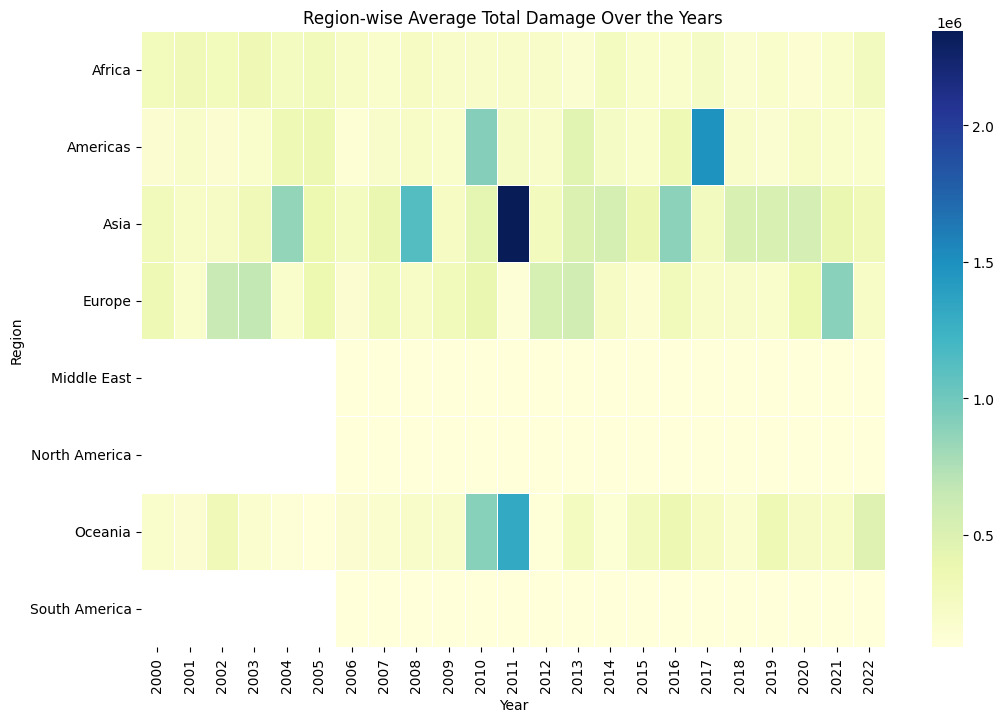

In [ ]:
# Region
region_damage_avg = new_combined_df.groupby(['Region', 'Year'])['Total Damage'].mean().unstack()

# Check the result
print(region_damage_avg)
# Heatmap

plt.figure(figsize=(12, 8))
sns.heatmap(region_damage_avg, cmap='YlGnBu', annot=False, linewidths=.5)
plt.title('Region-wise Average Total Damage Over the Years')
plt.xlabel('Year')
plt.ylabel('Region')
plt.show()


In [ ]:
new_combined_df.isna().sum()

Country Code             0
Country                  0
Region                   0
Year                     0
Disaster Type            0
Total Deaths             0
Total Affected           0
Total Damage             0
GDP                      0
CO2 emissions (kt)       0
NY.GDP.TOTL.RT.ZS      622
predict_damage_2030      0
ISO_A3                   0
dtype: int64